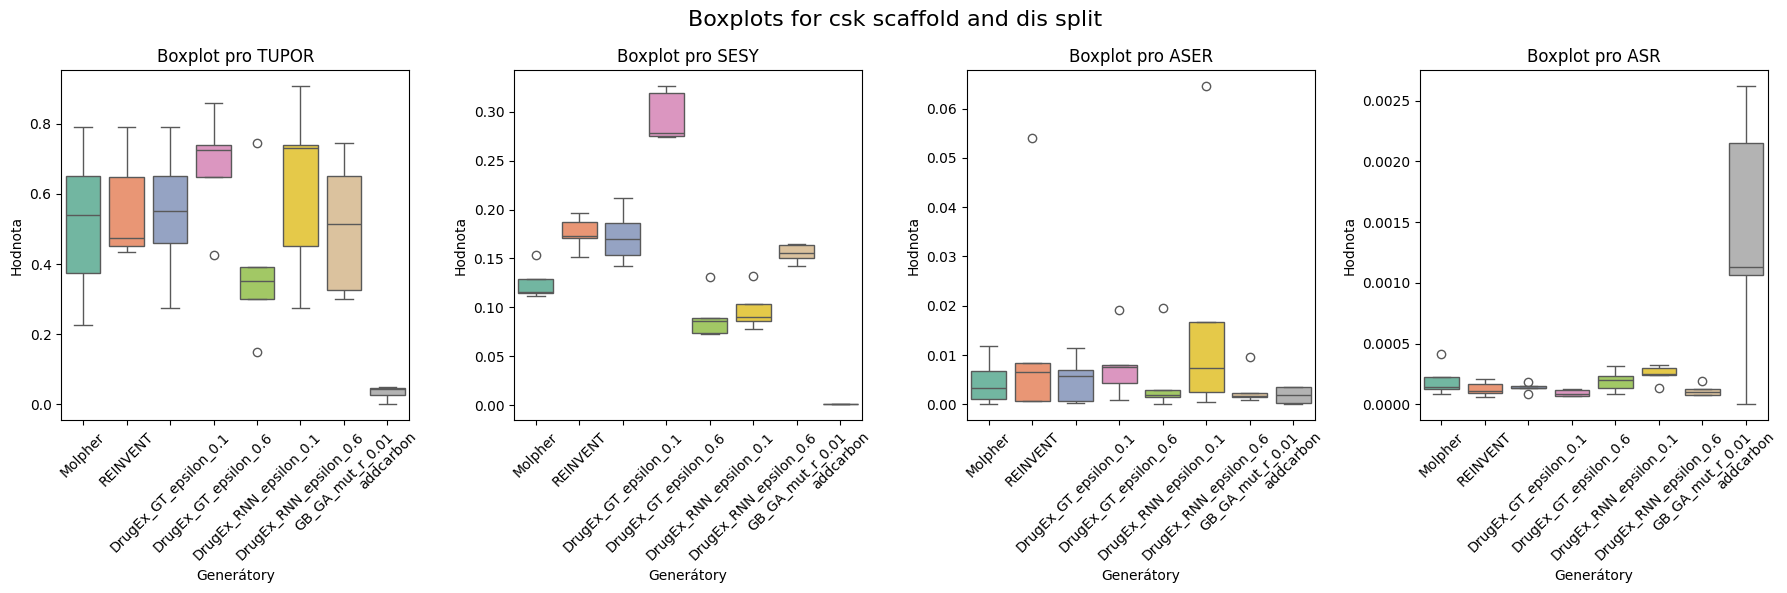

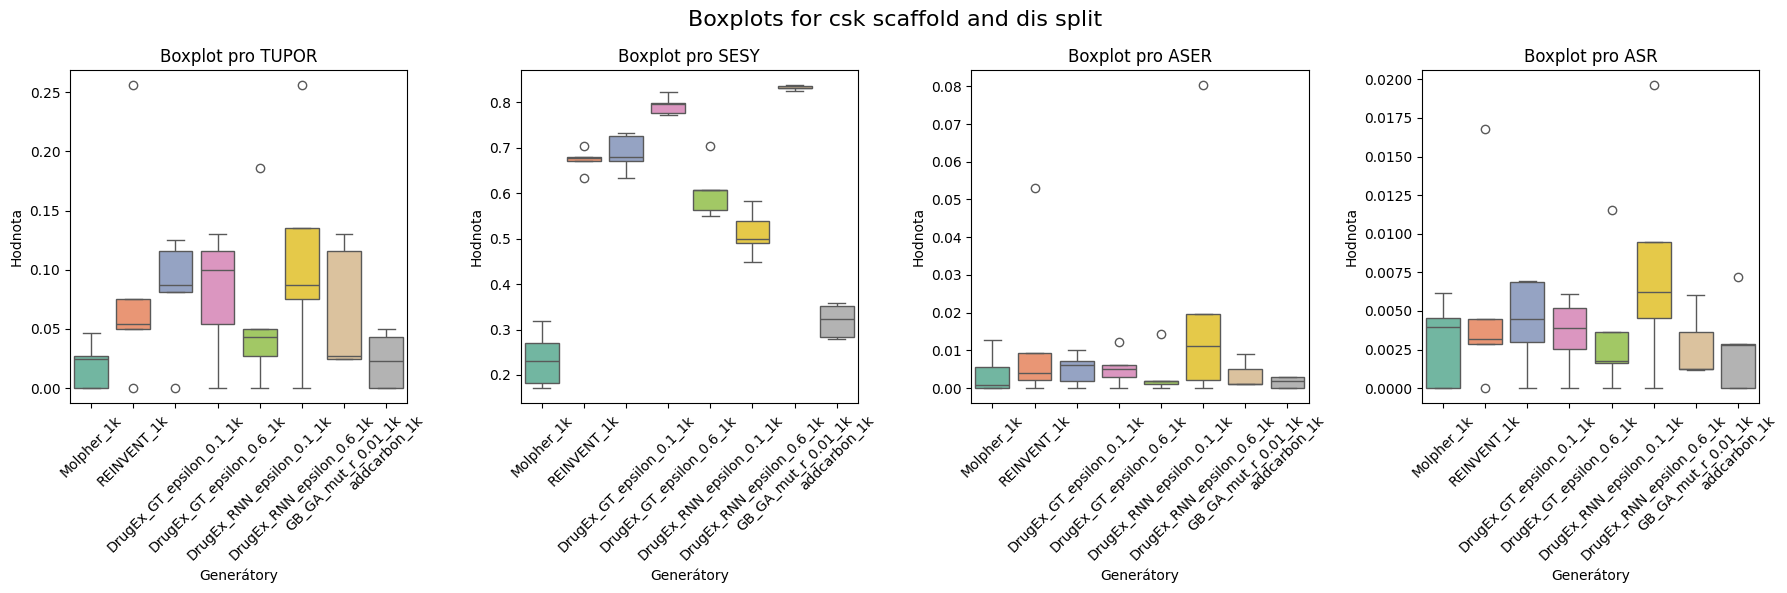

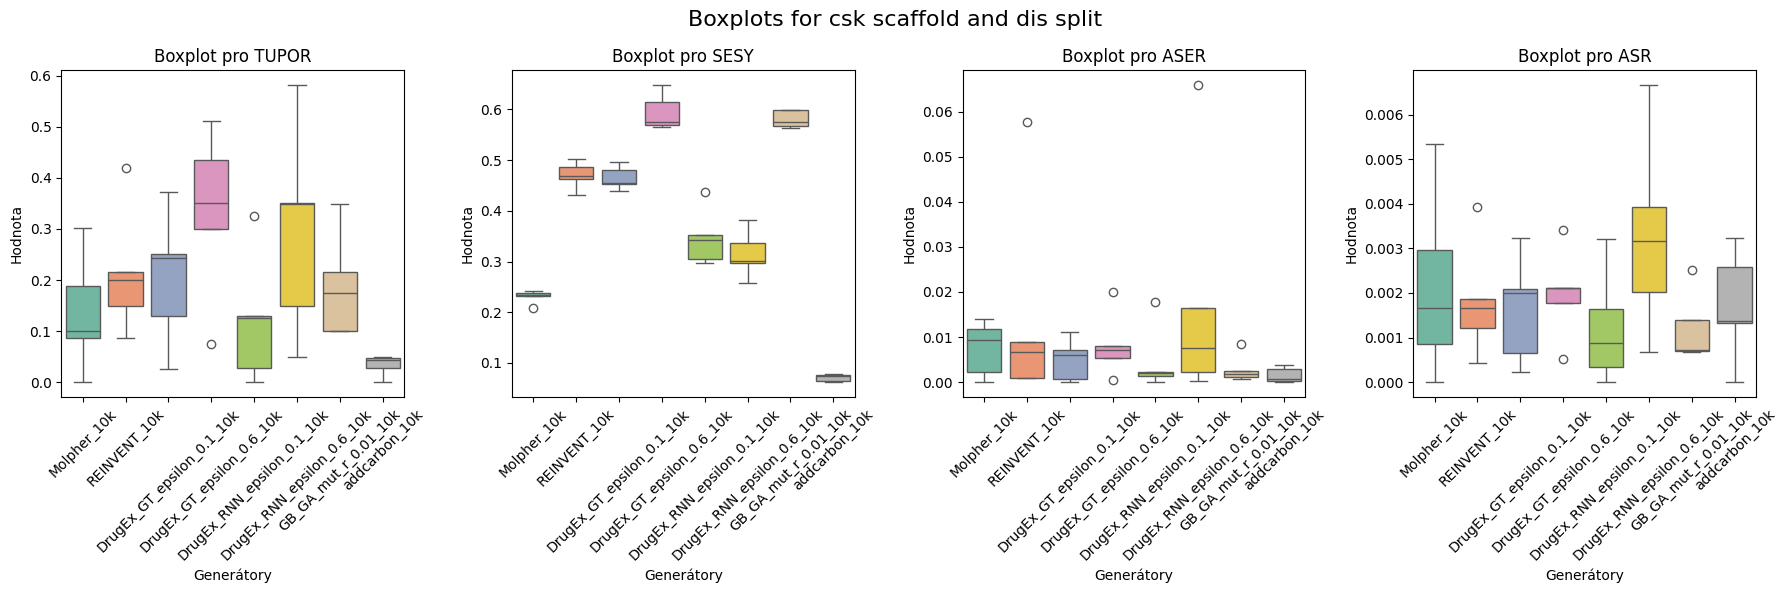

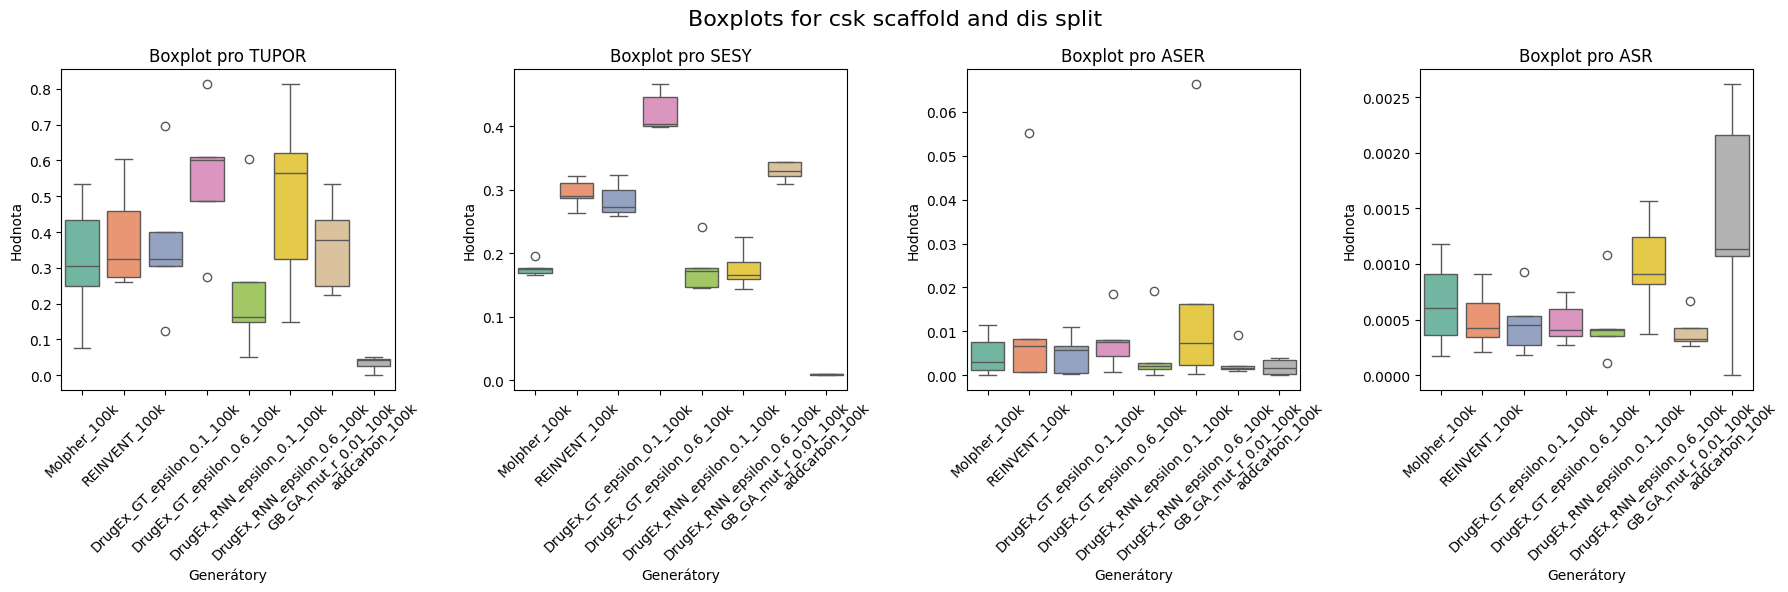

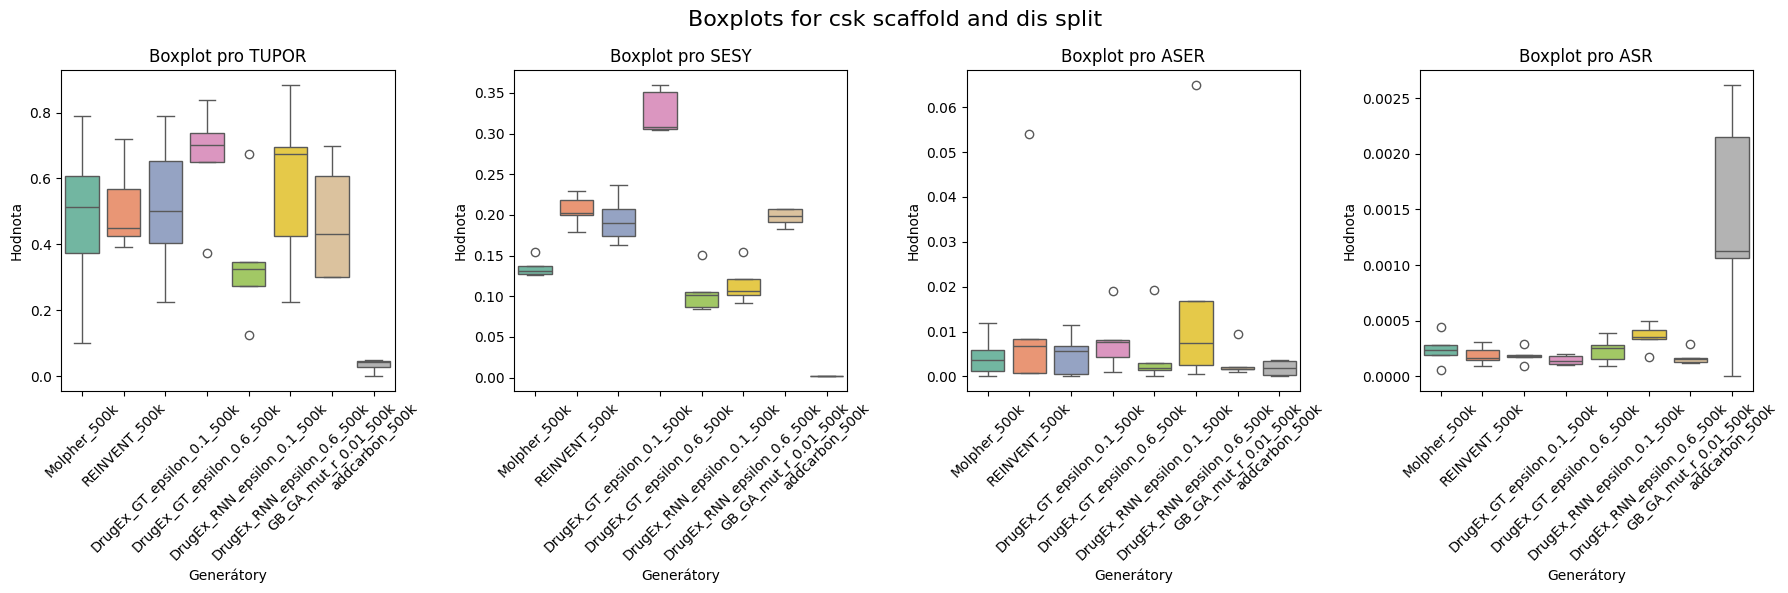

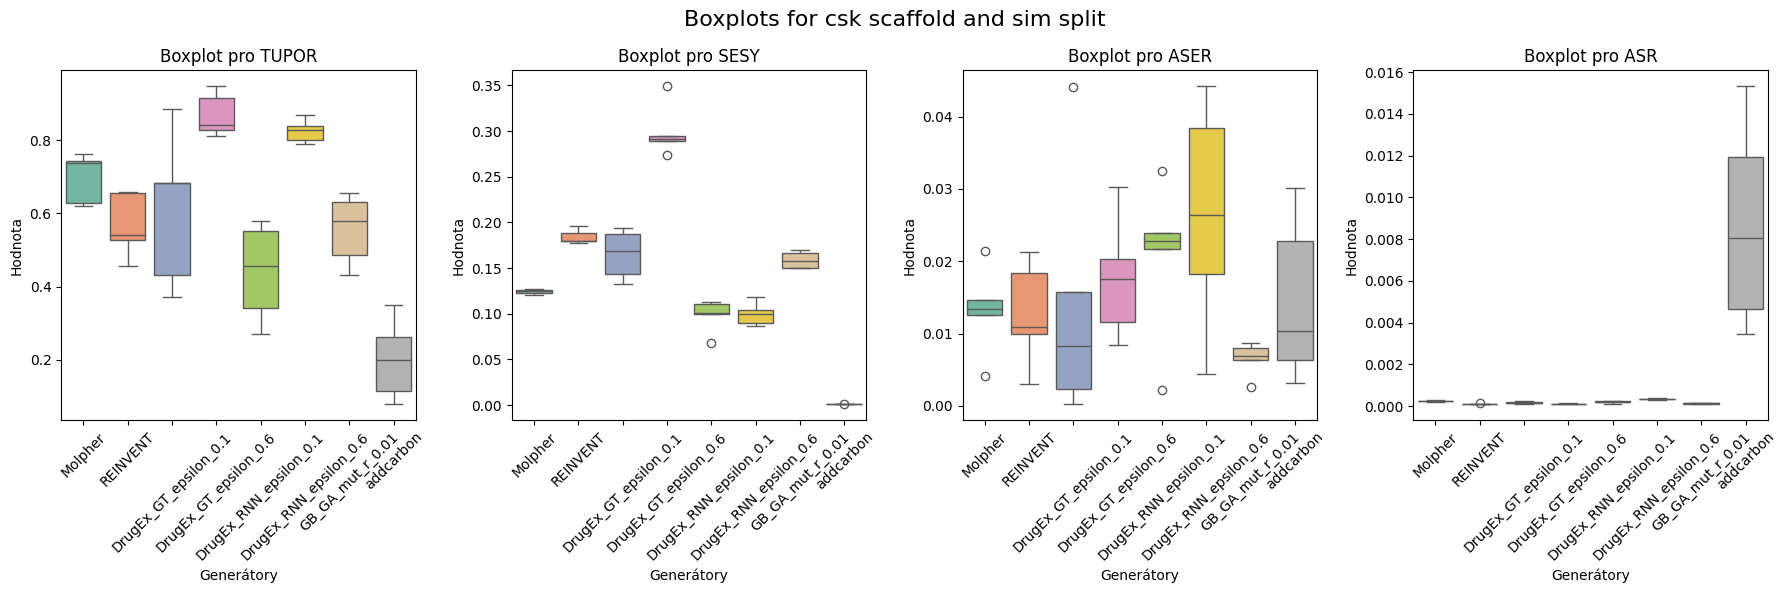

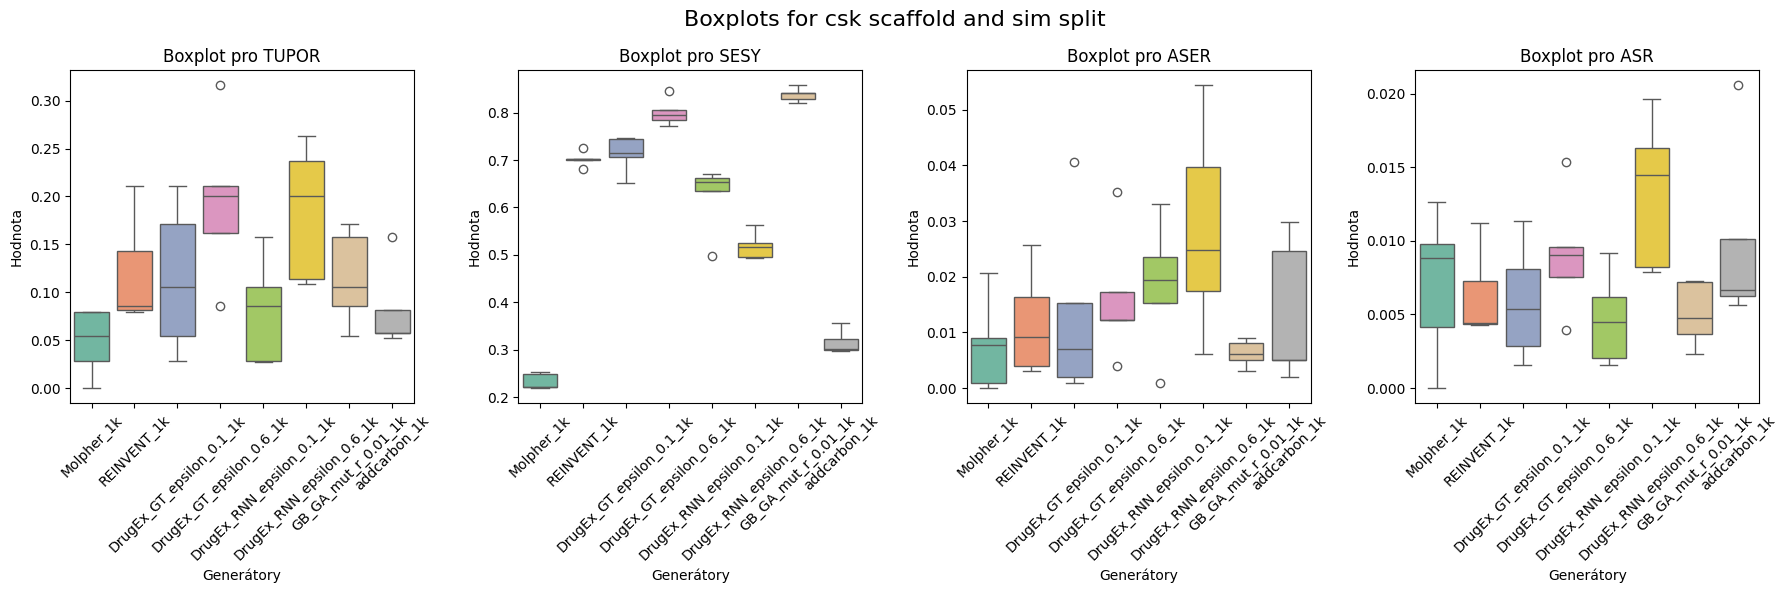

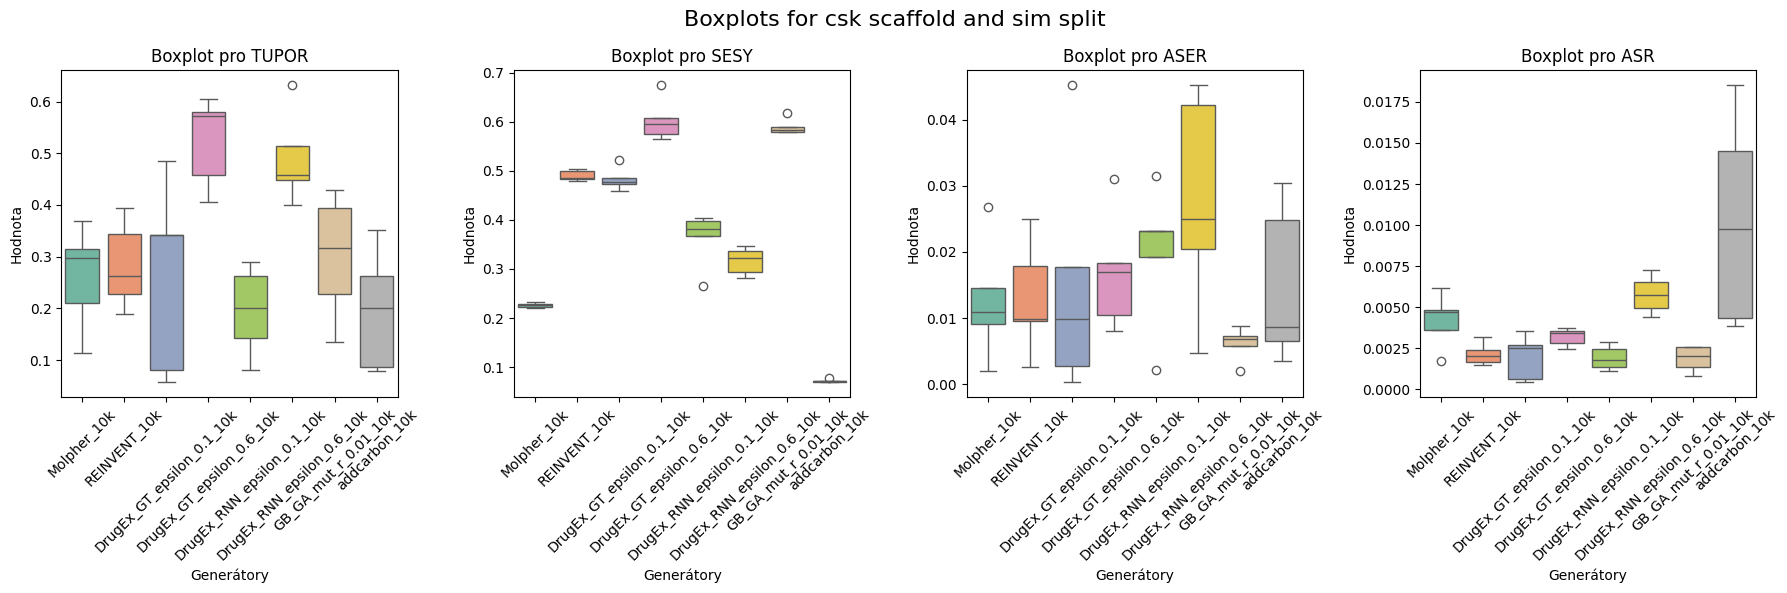

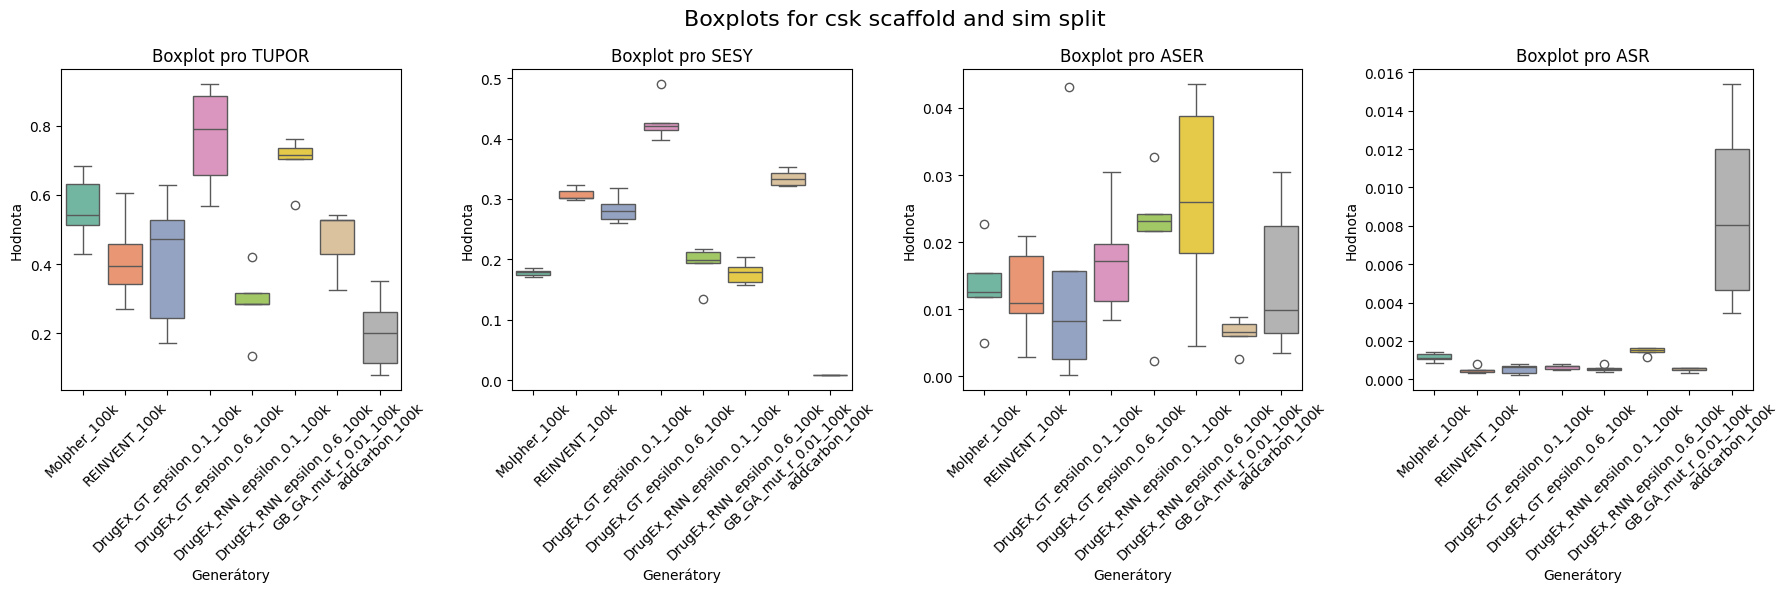

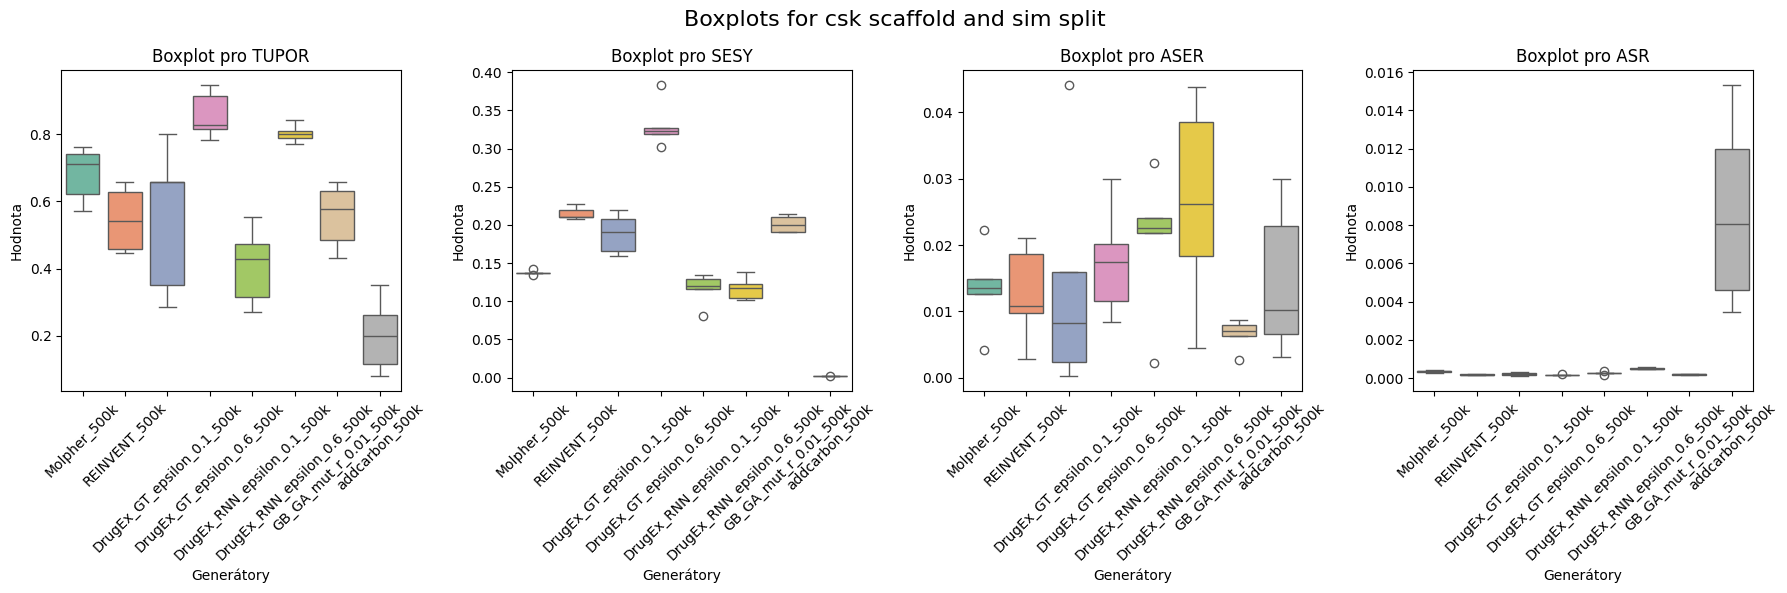

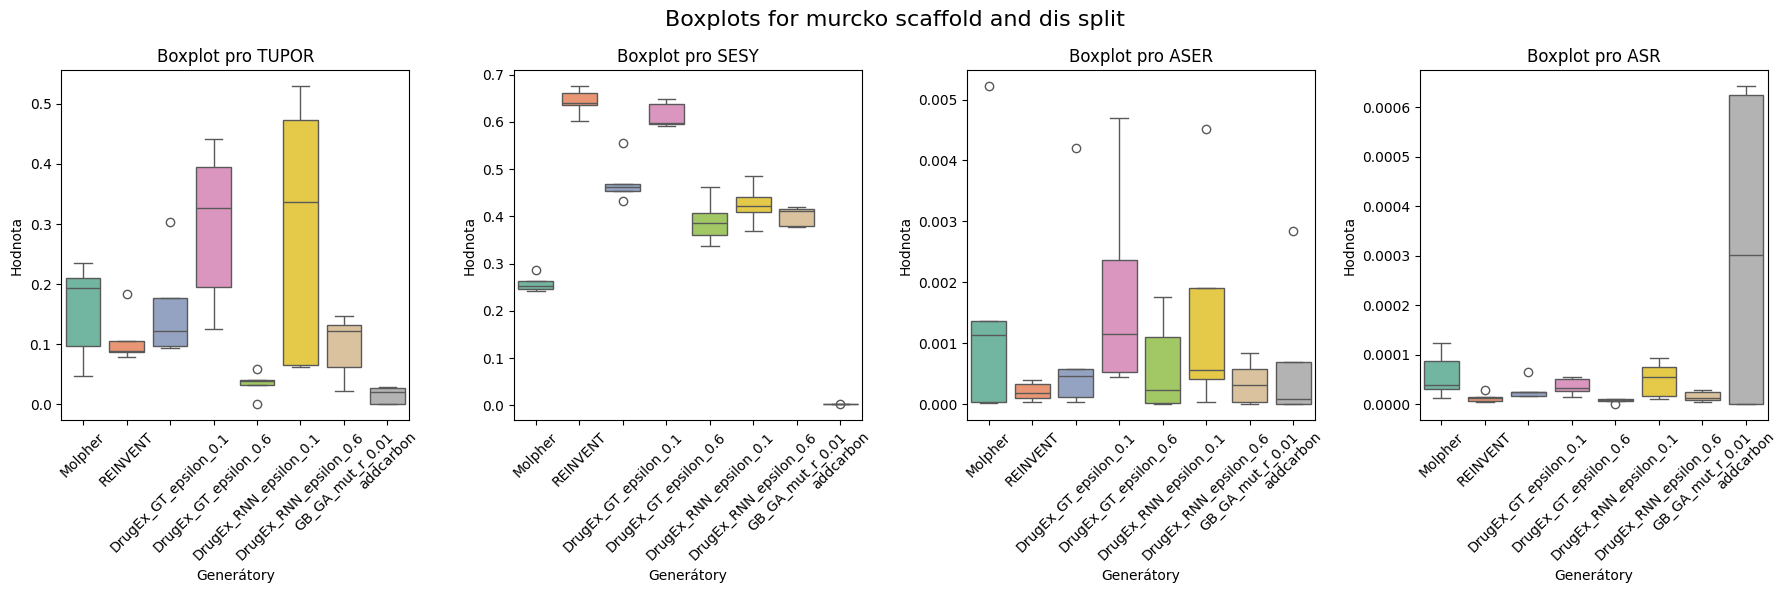

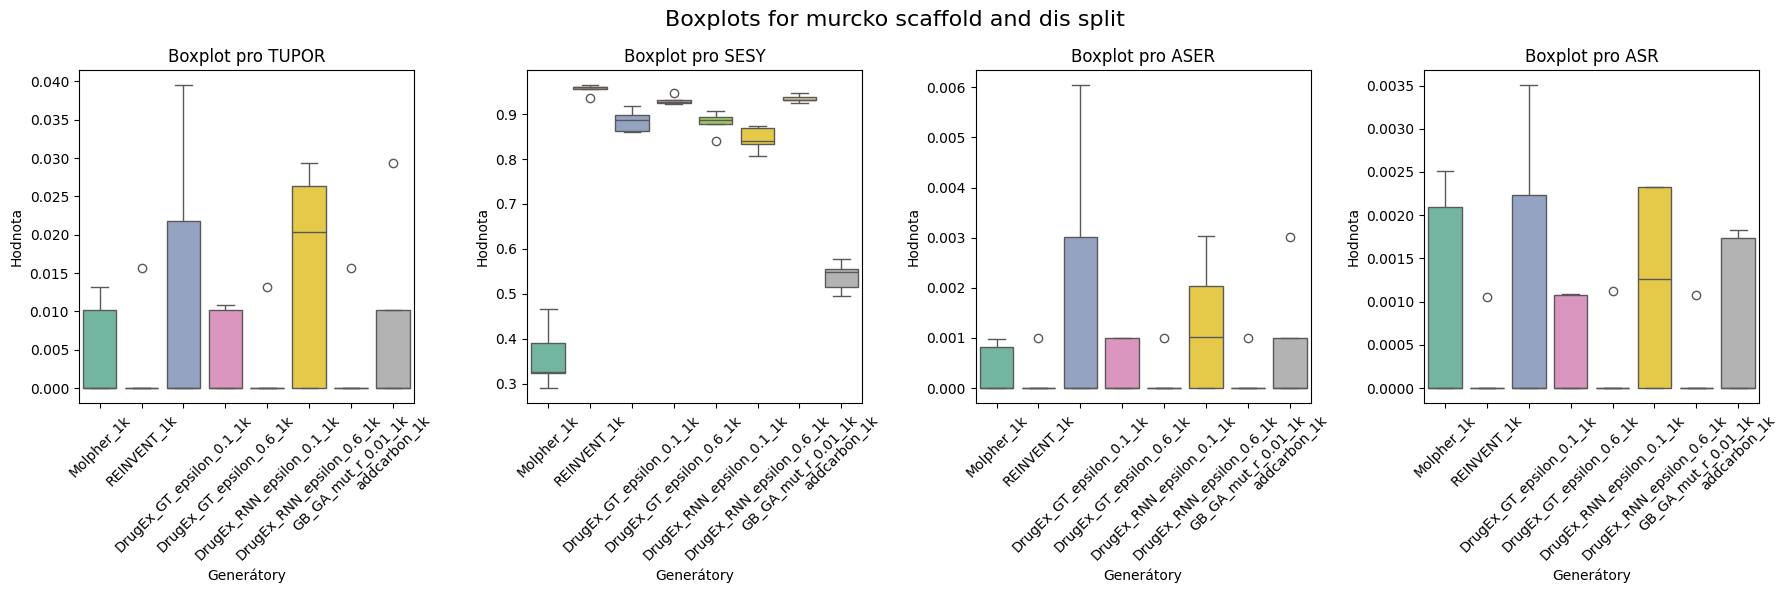

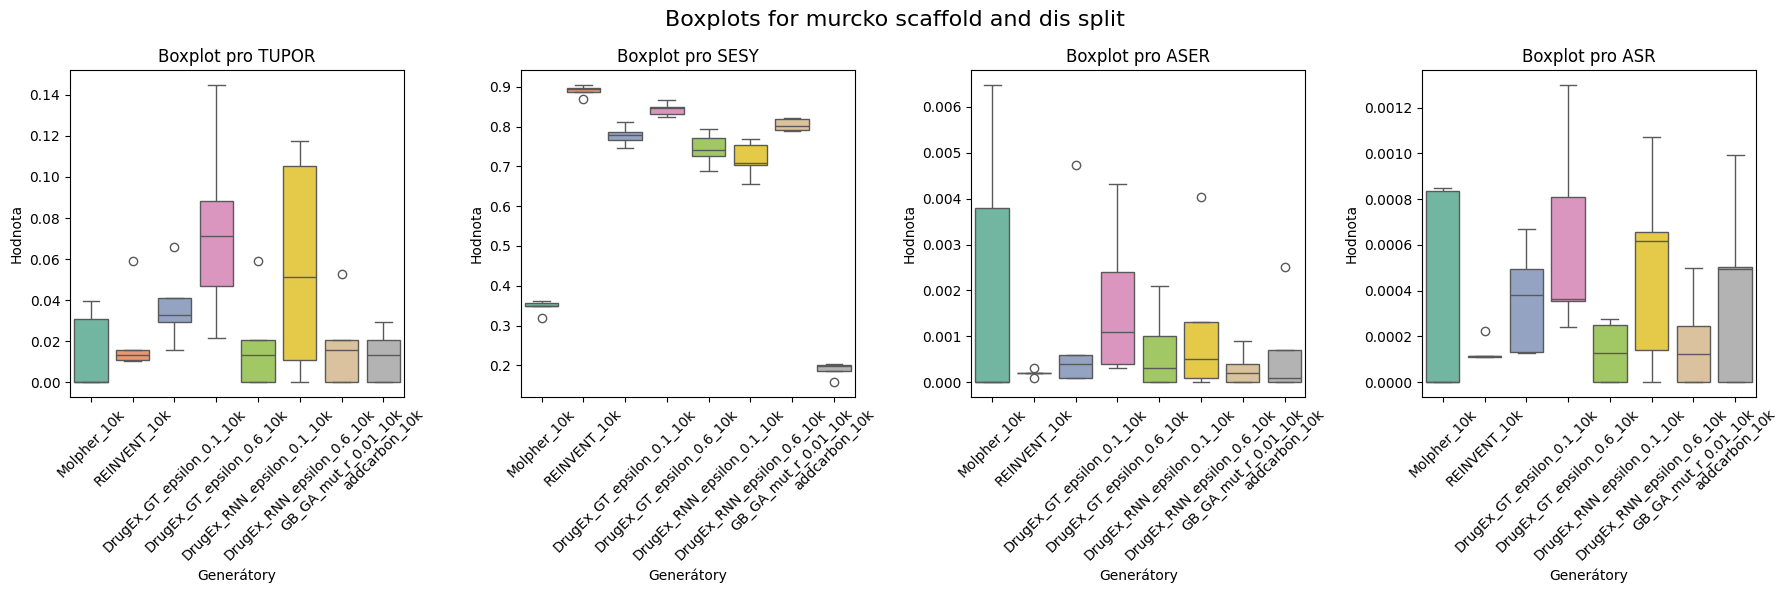

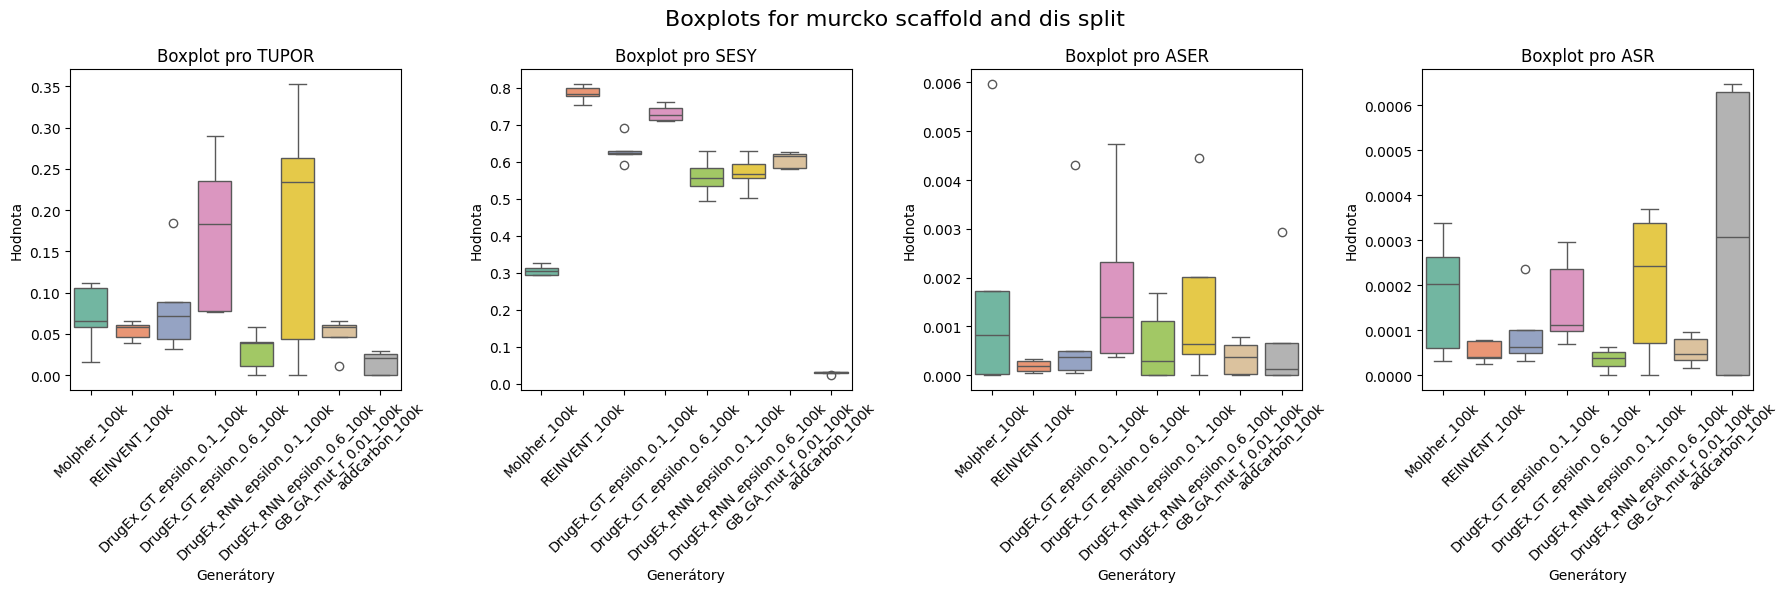

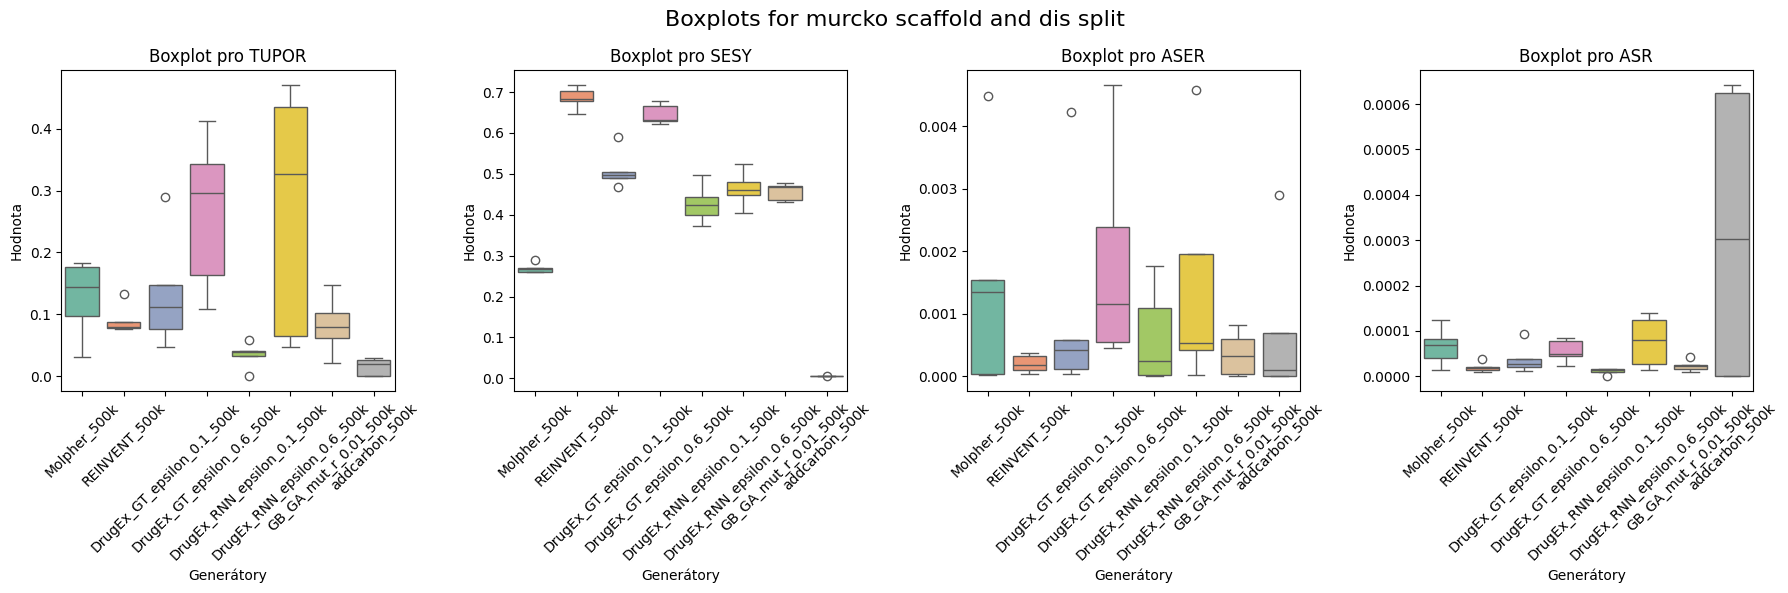

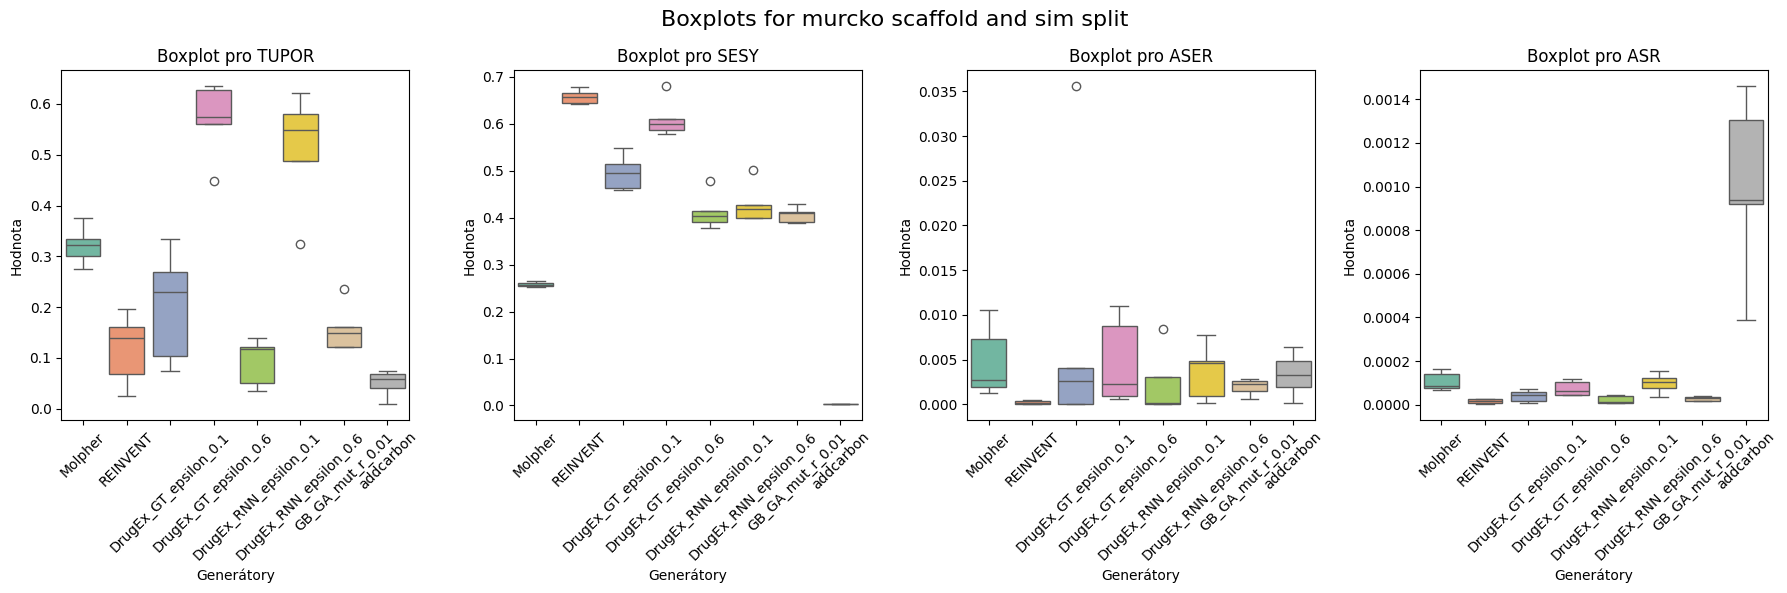

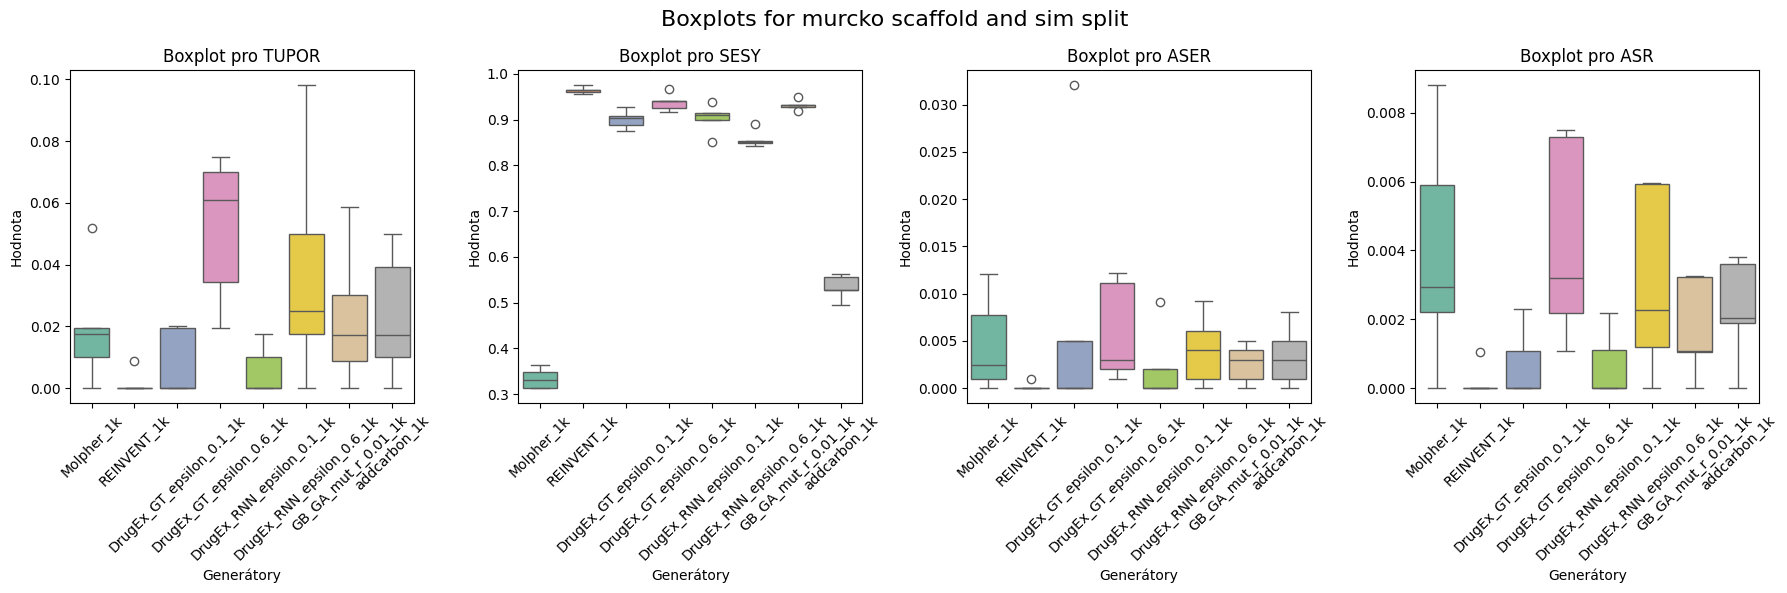

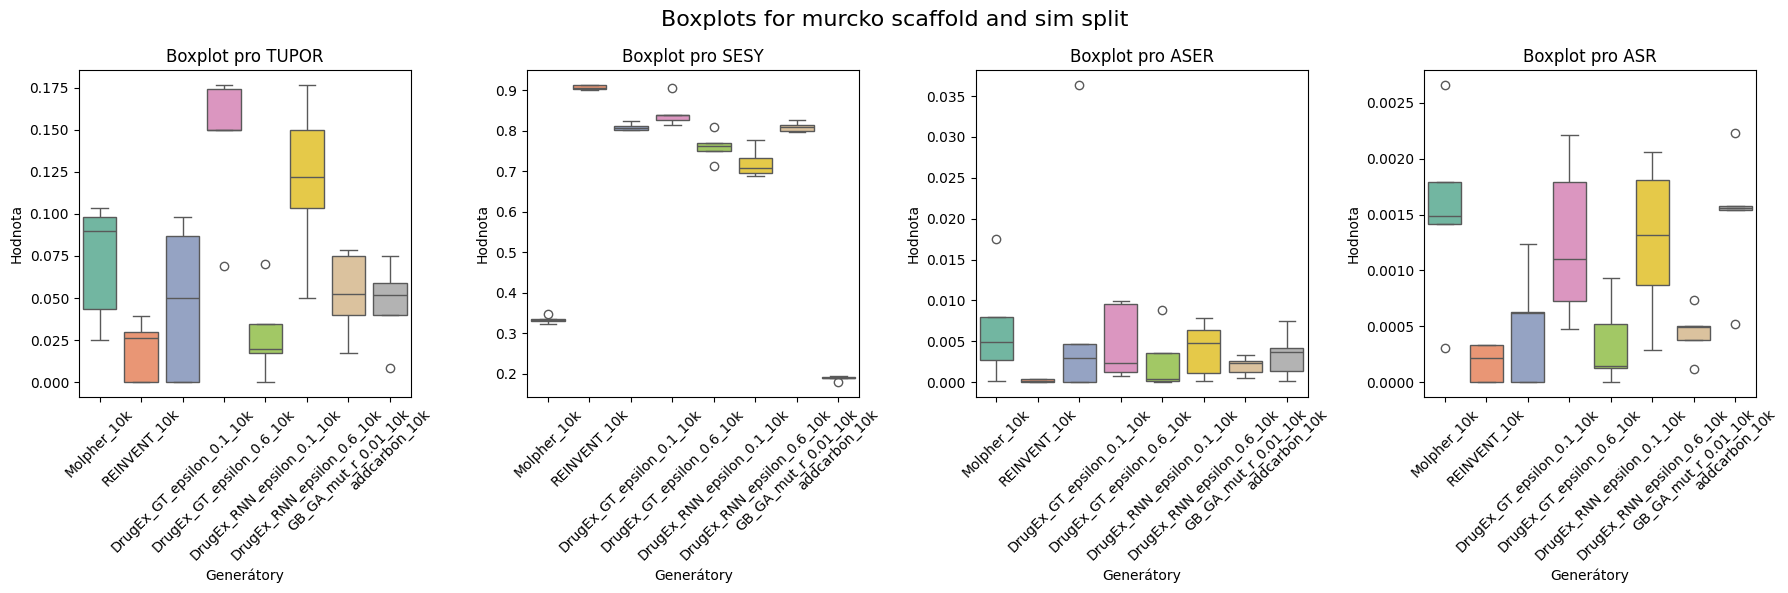

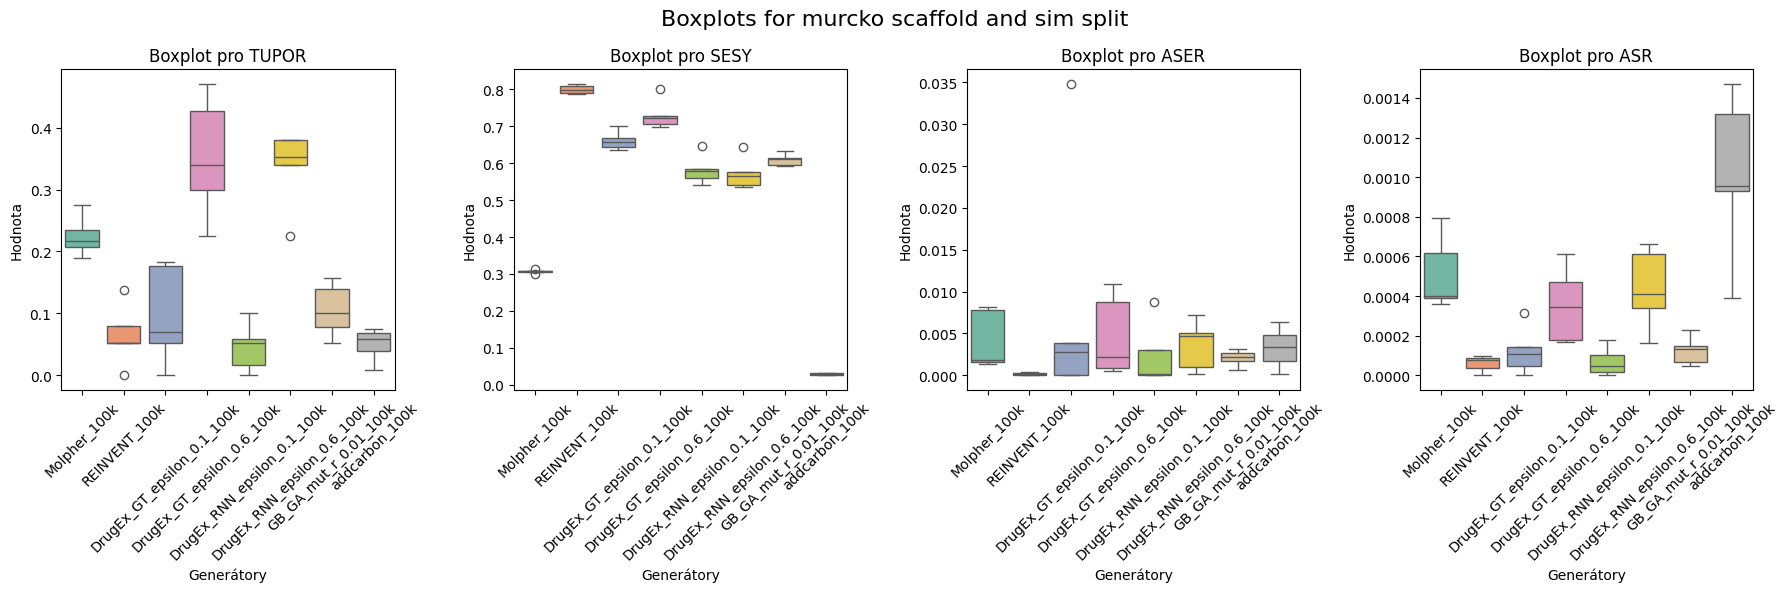

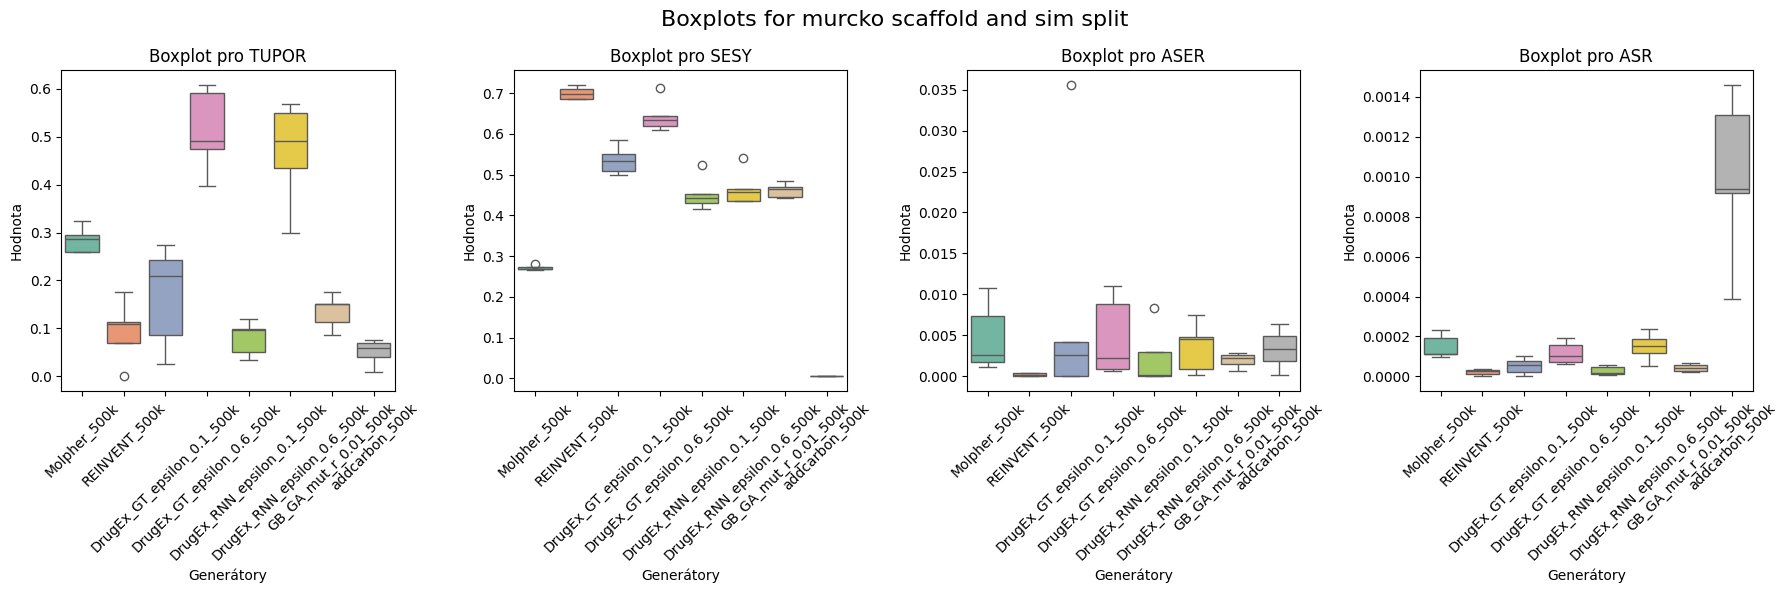

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vytvoření datového rámce na základě poskytnutých dat




for type_scaf in ['csk', 'murcko']:
    for type_split in ['dis', 'sim']:
        for subsets in ['', '_1k', '_10k', '_100k', '_500k']:
            df_all = pd.DataFrame()
            generators = [f'Molpher{subsets}', f'REINVENT{subsets}', f'DrugEx_GT_epsilon_0.1{subsets}', 
              f'DrugEx_GT_epsilon_0.6{subsets}', f'DrugEx_RNN_epsilon_0.1{subsets}', 
              f'DrugEx_RNN_epsilon_0.6{subsets}', f'GB_GA_mut_r_0.01{subsets}', f'addcarbon{subsets}']
            for gen in generators:

                df = pd.read_csv(f'data/results/Glucocorticoid_receptor/{type_scaf}_scaffolds/{type_split}/{gen}/df_all_clusters_with_mean.csv')
                df = df[['name','TUPOR','SESY', 'ASER','ASR']]
                df = df[0:5]
                df['name'] = gen
                df_all = pd.concat([df_all,df])
            
            df_all = df_all.reset_index(drop=True)

            # Převedení na dlouhý formát pro snadnější vizualizaci
            long_data = pd.melt(
                df_all,
                id_vars=["name"],
                value_vars=["TUPOR", "SESY", "ASER", "ASR"],
                var_name="Metric",
                value_name="Value",
            )
            
            # Nastavení velikosti grafu a subplotů 2x2
            fig, axes = plt.subplots(1, 4, figsize=(18, 6))
            
            # Seznam metrik
            metrics = ["TUPOR", "SESY", "ASER", "ASR"]
            
            # Seznam barev pro každý generátor
            palette = sns.color_palette("Set2", len(generators))
            
            # Vykreslení boxplotů pro každou metriku do samostatného subplotu
            for i, metric in enumerate(metrics):
                ax = axes[i]
                sns.boxplot(data=long_data[long_data['Metric'] == metric], 
                            x="name", y="Value", ax=ax, hue="name", palette=palette, legend=False)
                ax.set_title(f"Boxplot pro {metric}", fontsize=12)
                ax.set_xlabel("Generátory", fontsize=10)
                ax.set_ylabel("Hodnota", fontsize=10)
                ax.tick_params(axis='x', rotation=45)
            
            fig.suptitle(f"Boxplots for {type_scaf} scaffold and {type_split} split", fontsize=16)
            # Přizpůsobení grafu
            plt.tight_layout()
            plt.savefig(f'img/box_plots/{type_scaf}/box_plot_{type_split}_{subsets}.png')
            plt.savefig(f'img/box_plots/{type_scaf}/box_plot_{type_split}_{subsets}.svg', format="svg")
            # Zobrazení grafu
            plt.show()
            

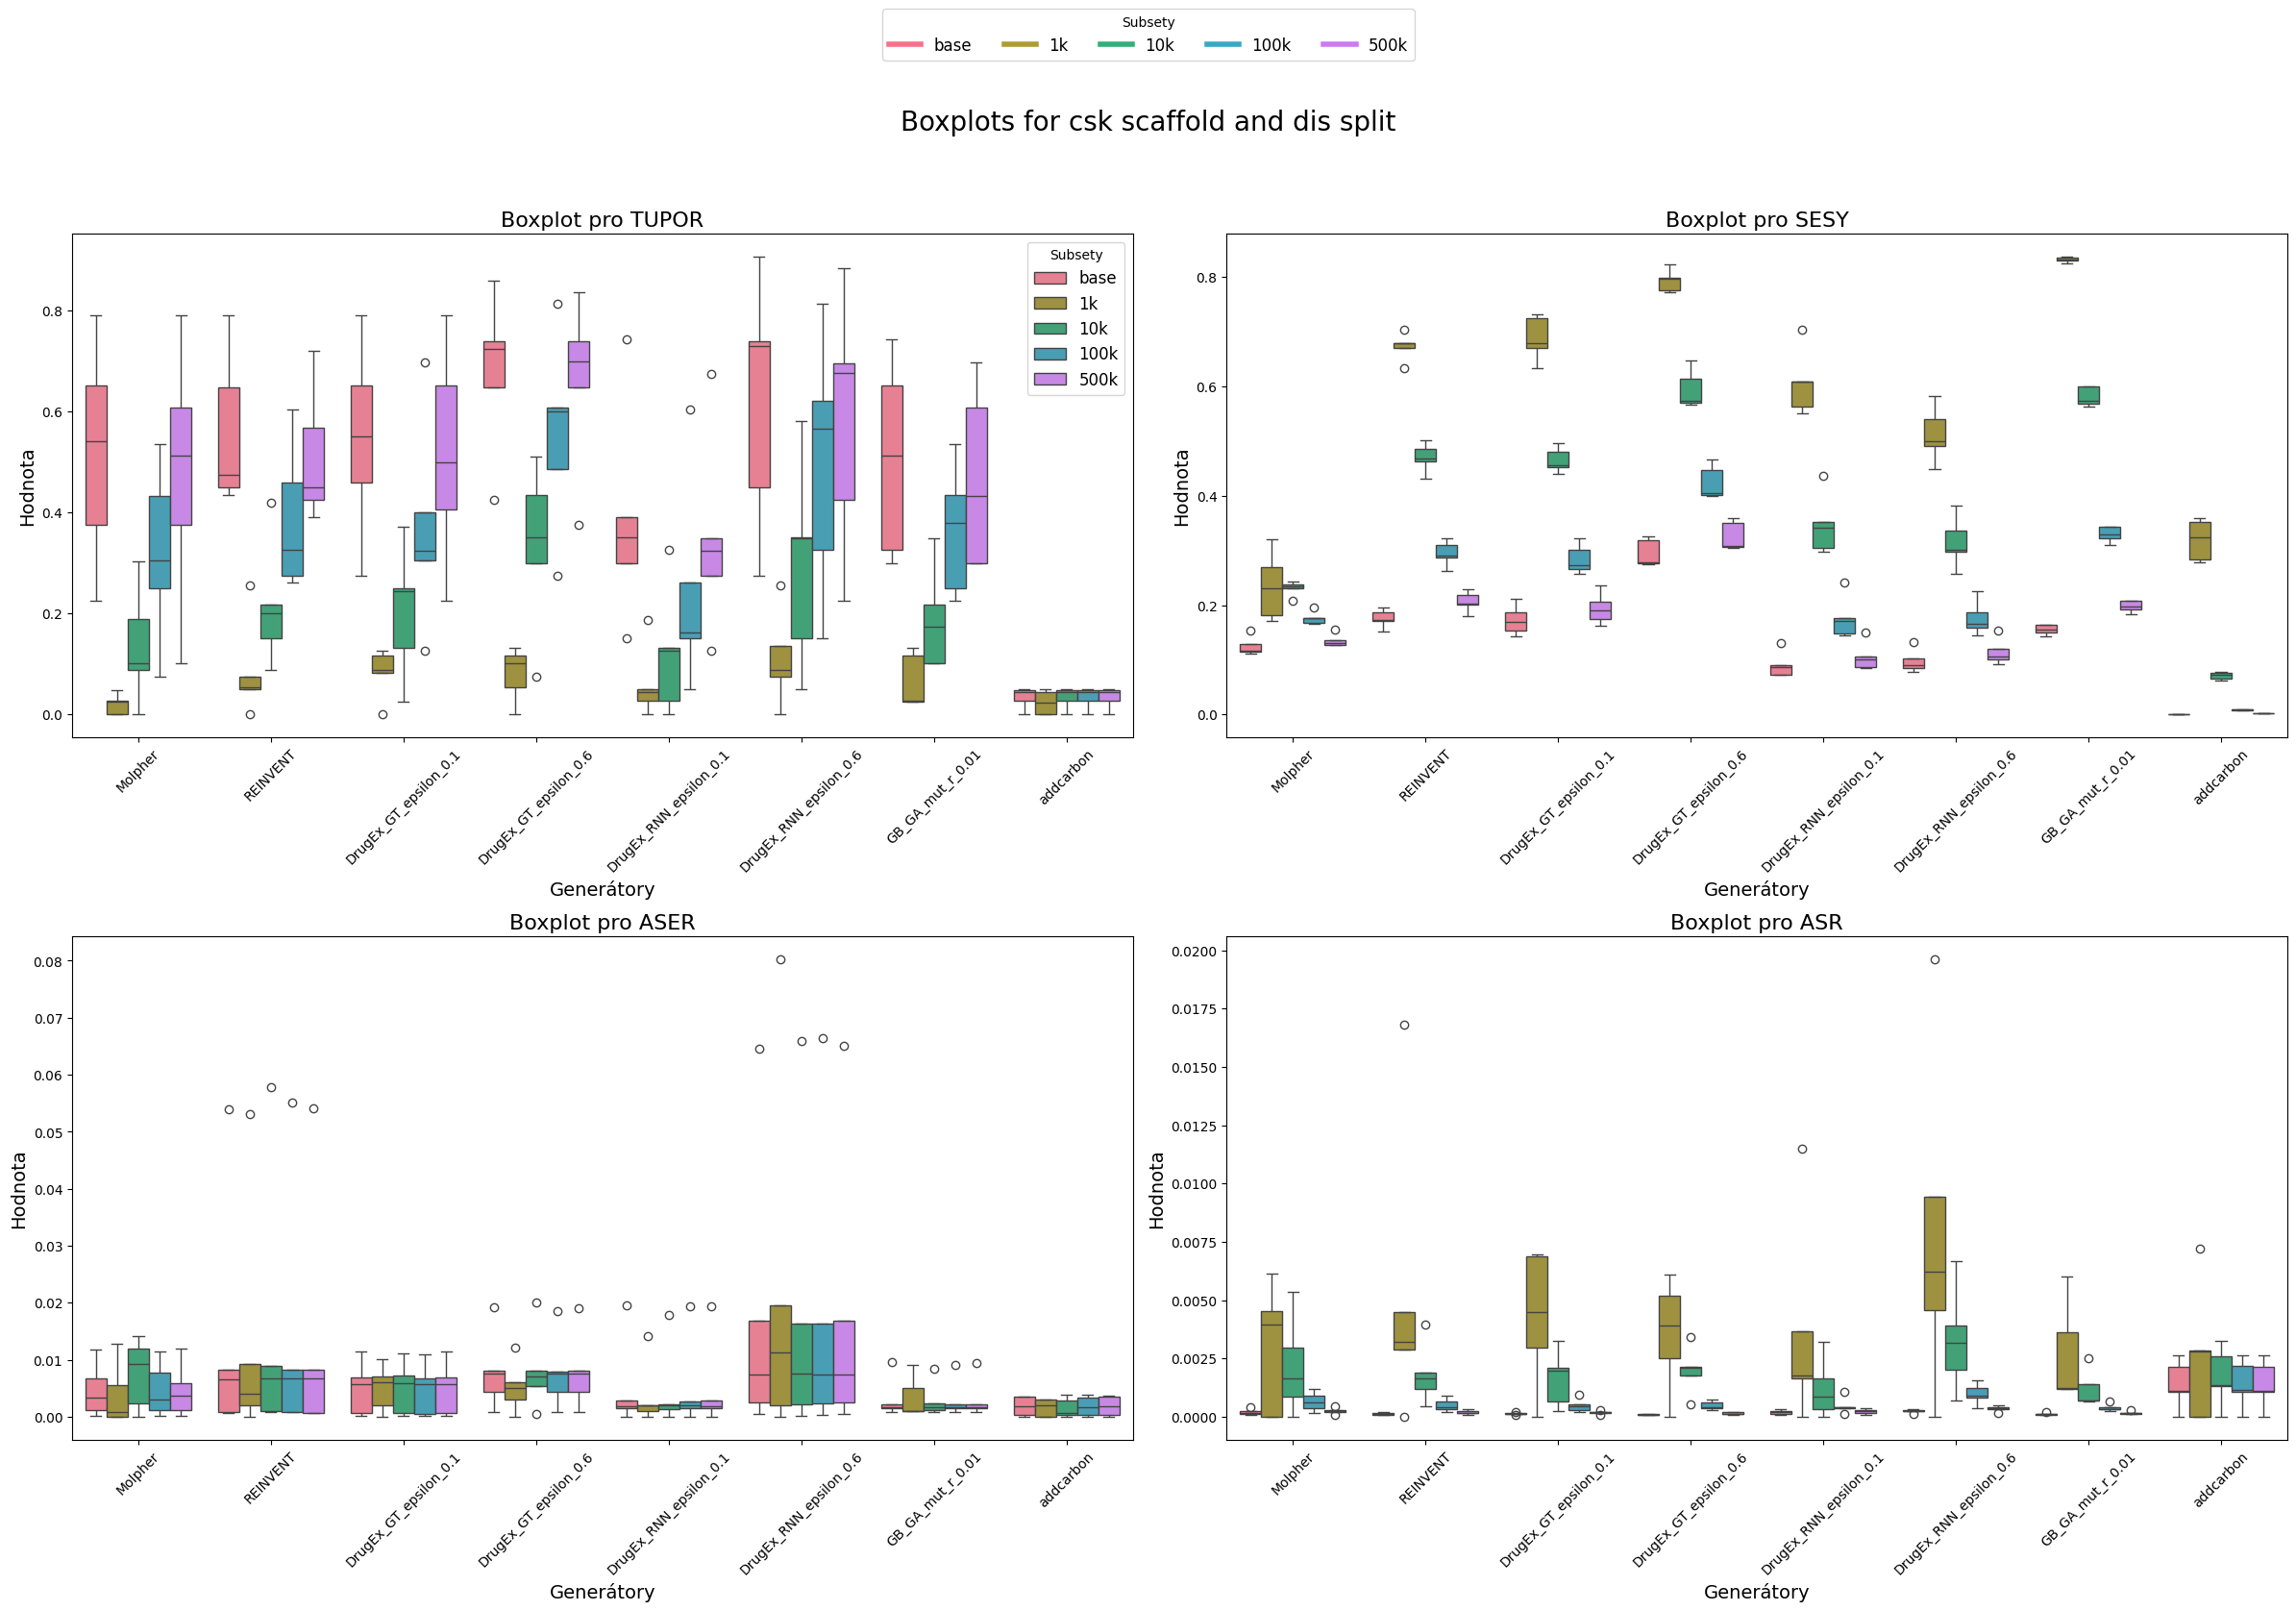

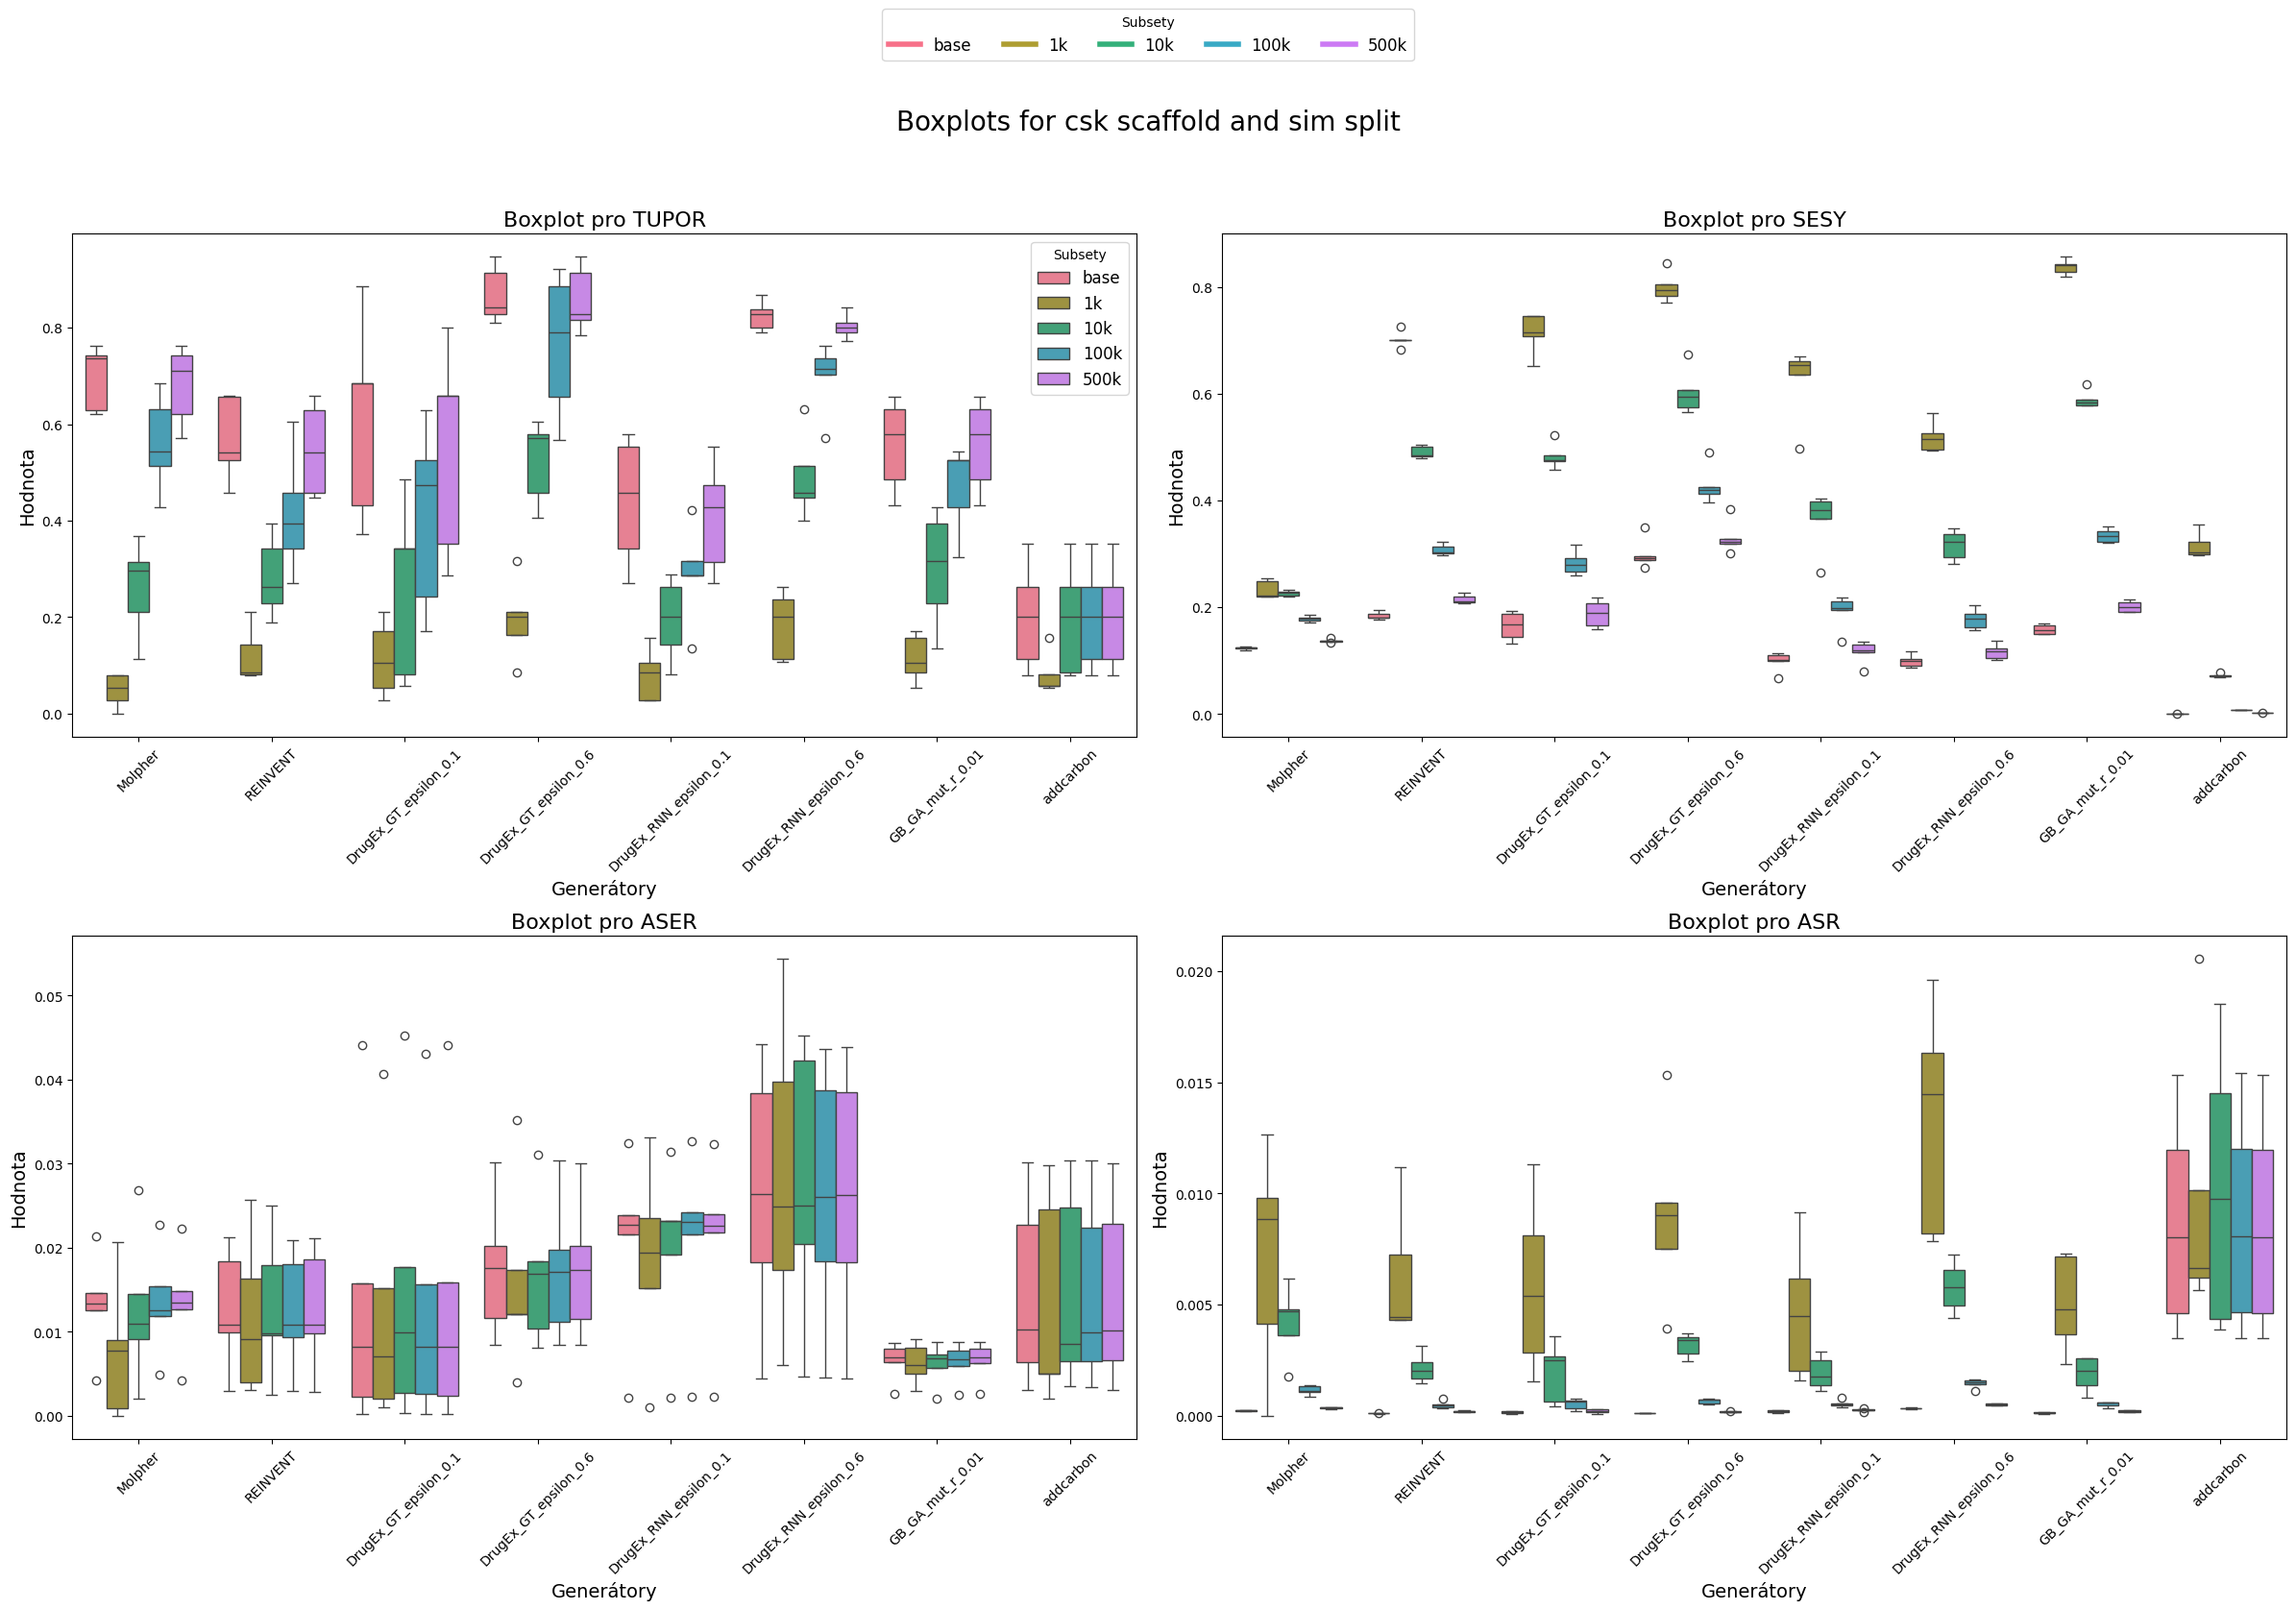

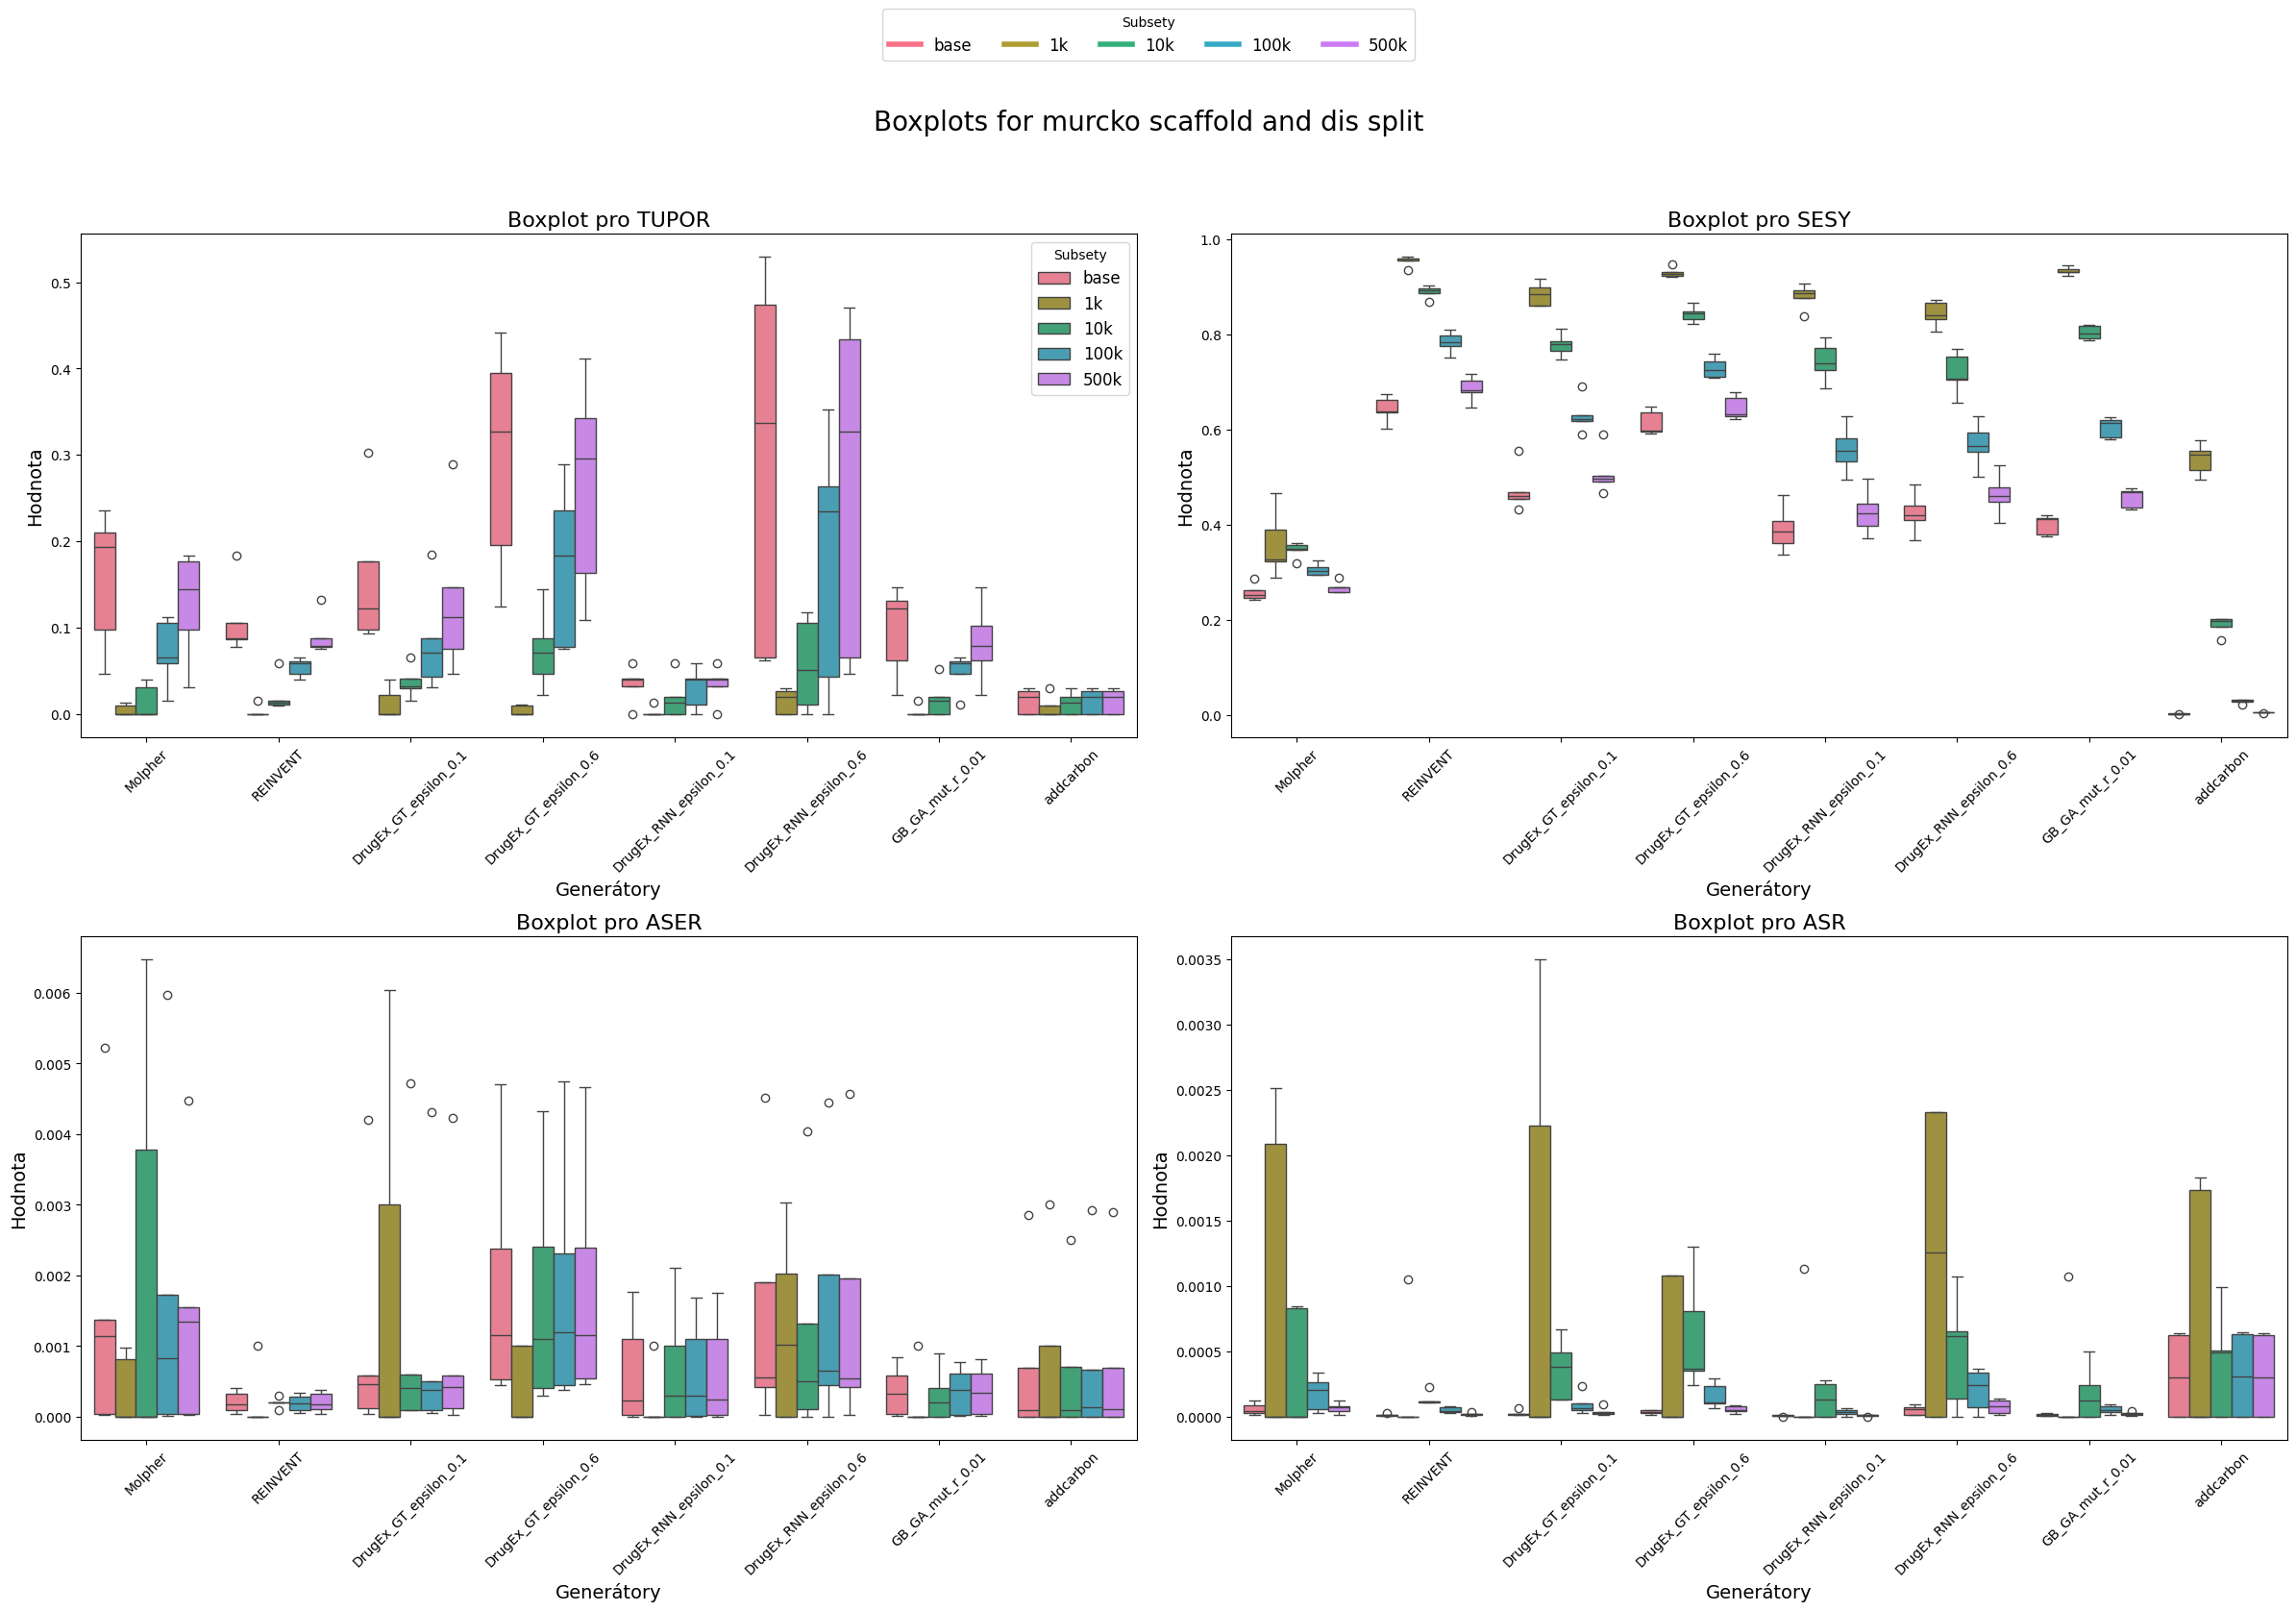

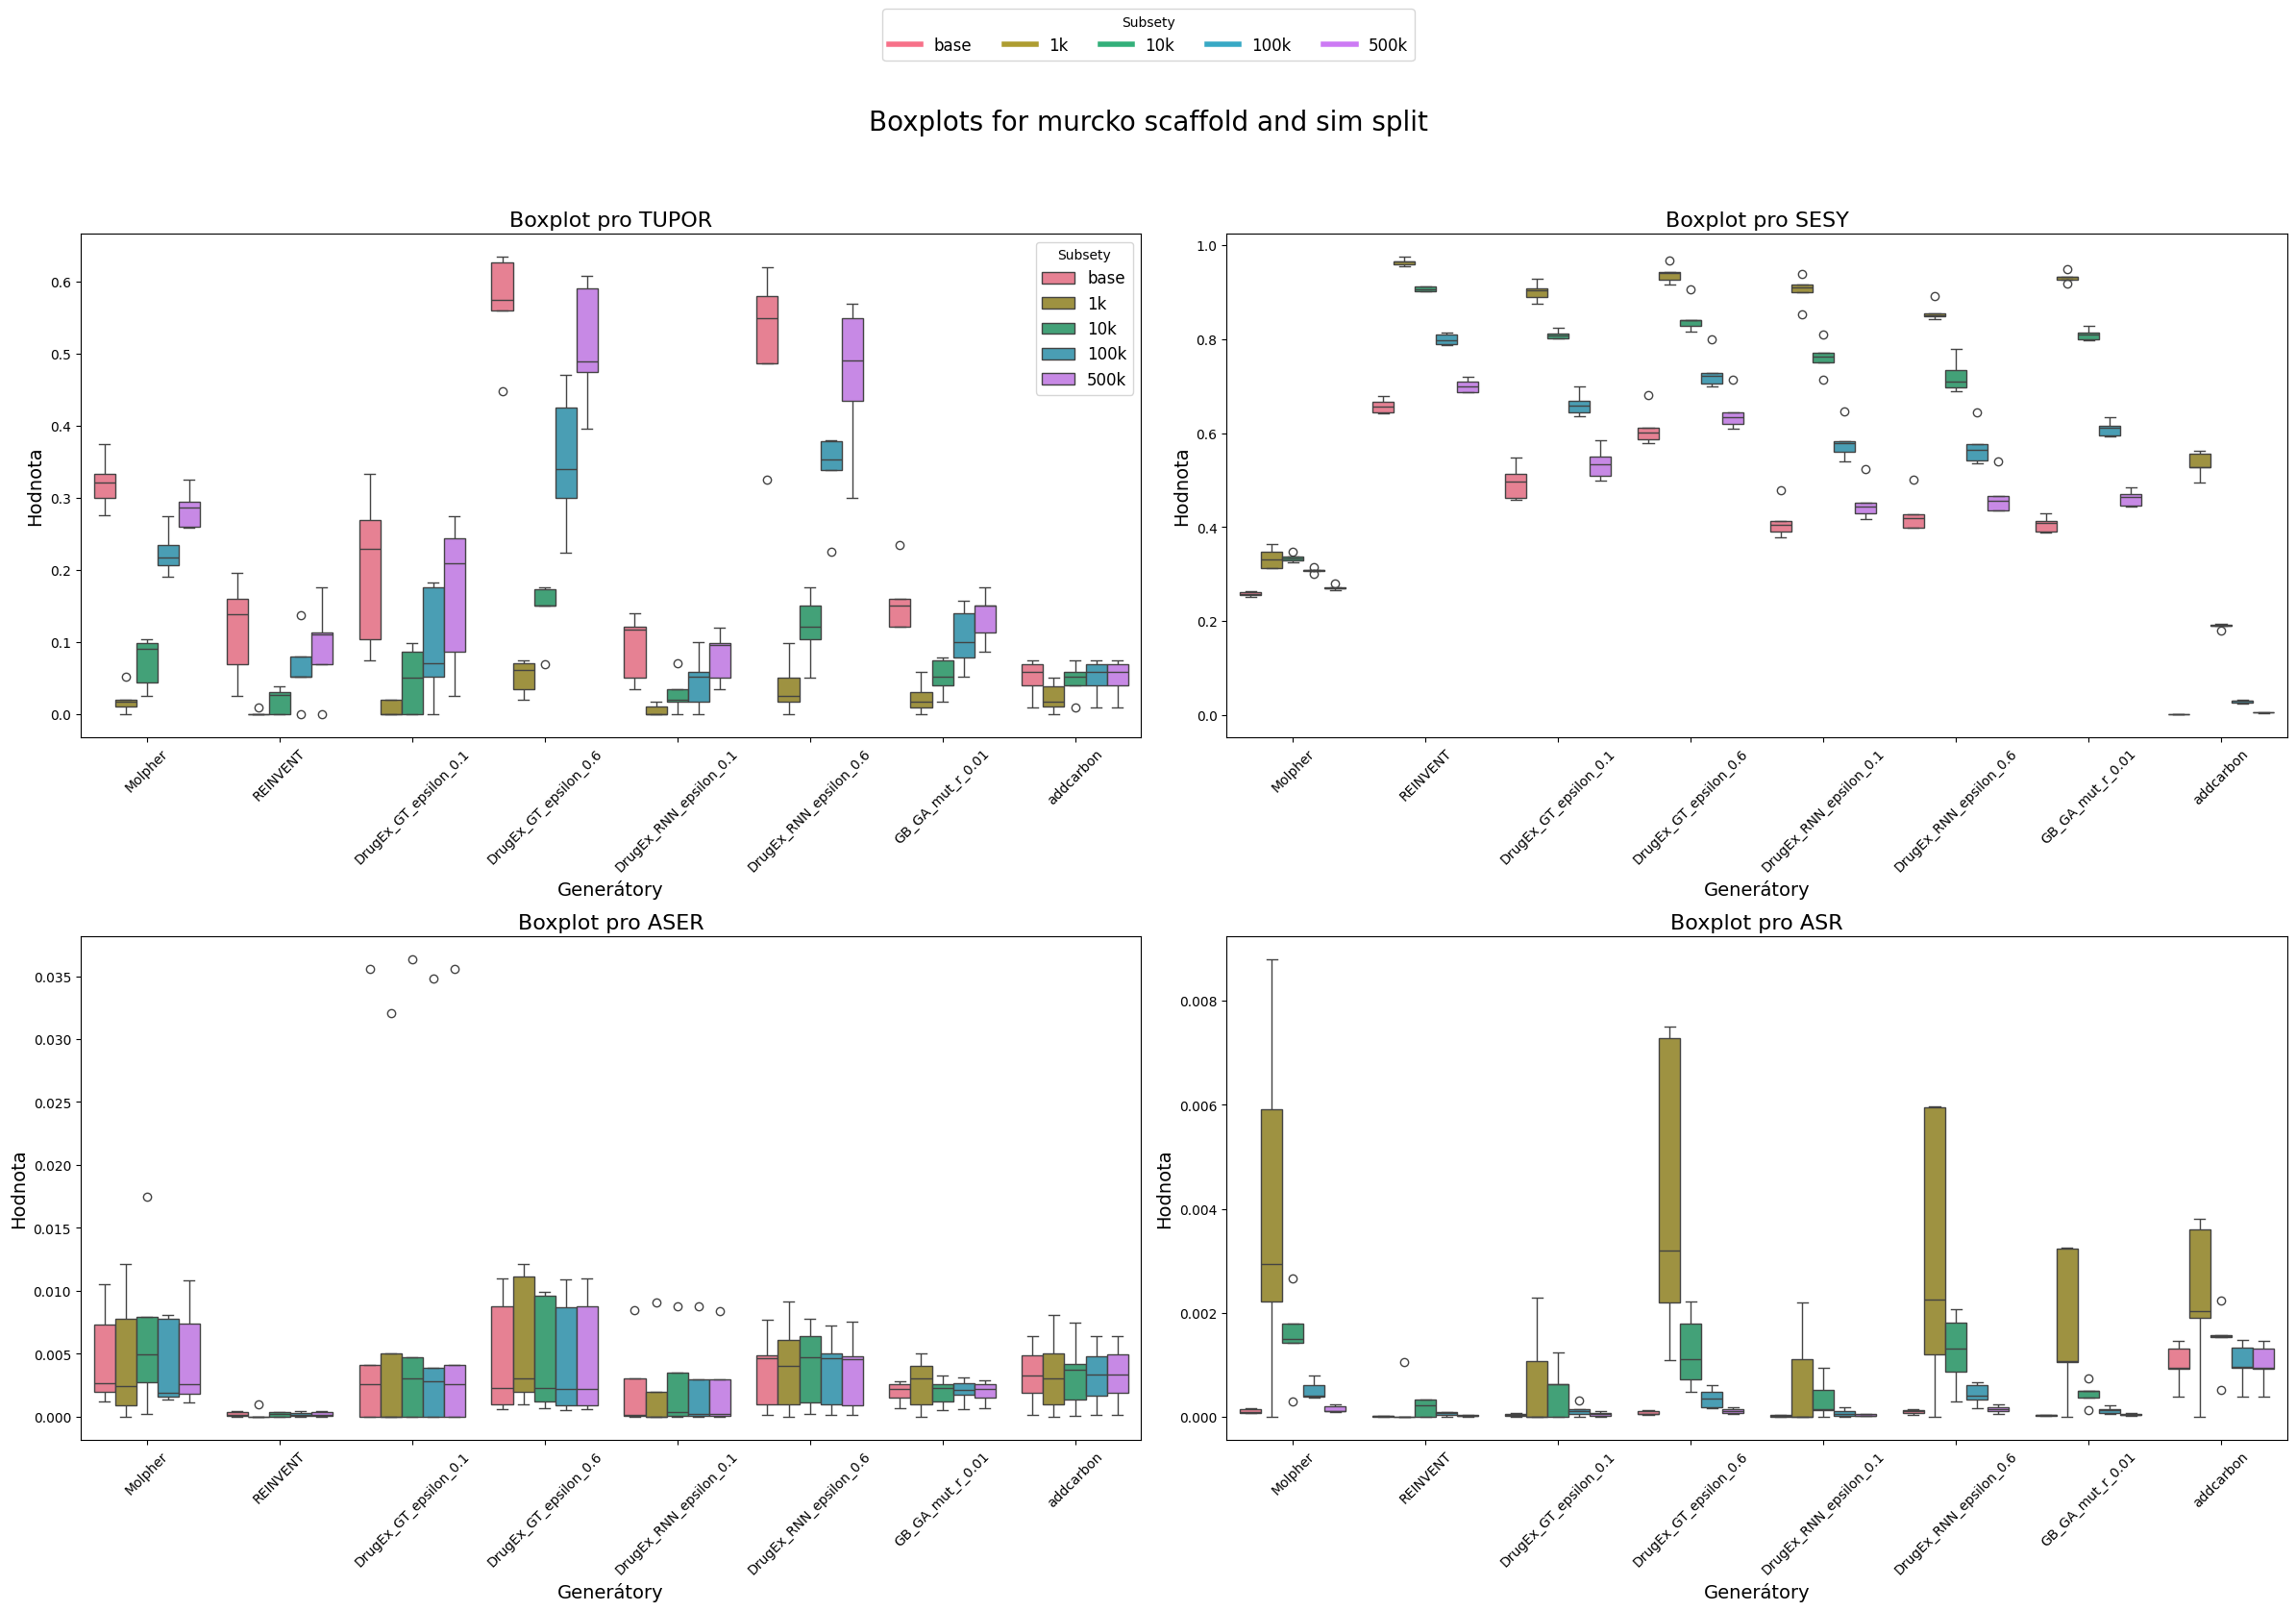

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vytvoření datového rámce na základě poskytnutých dat
for type_scaf in ['csk', 'murcko']:
    for type_split in ['dis', 'sim']:
        df_all = pd.DataFrame()
        subsets_list = ['', '_1k', '_10k', '_100k', '_500k']
        subsets_list_l = ['base', '1k', '10k', '100k', '500k']
        generators_base = ['Molpher', 'REINVENT', 'DrugEx_GT_epsilon_0.1', 
                           'DrugEx_GT_epsilon_0.6', 'DrugEx_RNN_epsilon_0.1', 
                           'DrugEx_RNN_epsilon_0.6', 'GB_GA_mut_r_0.01', 'addcarbon']
        
        for subsets in subsets_list:
            for gen_base in generators_base:
                gen = f"{gen_base}{subsets}"
                df = pd.read_csv(f'data/results/Glucocorticoid_receptor/{type_scaf}_scaffolds/{type_split}/{gen}/df_all_clusters_with_mean.csv')
                df = df[['name', 'TUPOR', 'SESY', 'ASER', 'ASR']]
                df = df[0:5]
                df['Generator'] = gen_base  # Základní jméno generátoru
                df['Subset'] = f"{subsets[1:]}" if subsets else 'base'  # Subsety nebo základ
                
                df_all = pd.concat([df_all, df])
        
        df_all = df_all.reset_index(drop=True)

        # Převedení na dlouhý formát pro snadnější vizualizaci
        long_data = pd.melt(
            df_all,
            id_vars=["Generator", "Subset"],
            value_vars=["TUPOR", "SESY", "ASER", "ASR"],
            var_name="Metric",
            value_name="Value",
        )
        
        # Nastavení velikosti grafu a rozložení 2x2
        fig, axes = plt.subplots(2, 2, figsize=(24, 16))  # Velikost a mřížka
        axes = axes.flatten()  # Zploštění seznamu os
        
        # Seznam metrik
        metrics = ["TUPOR", "SESY", "ASER", "ASR"]
        
        # Barevná paleta pro subsety
        palette = sns.color_palette("husl", len(subsets_list_l))
        subset_colors = dict(zip(['base'] + subsets_list_l[1:], palette))  # Mapování subsetů na barvy
        
        # Vykreslení boxplotů pro každou metriku
        for i, metric in enumerate(metrics):
            ax = axes[i]
            sns.boxplot(
                data=long_data[long_data['Metric'] == metric],
                x="Generator", y="Value", hue="Subset", ax=ax, 
                palette=subset_colors
            )
            ax.set_title(f"Boxplot pro {metric}", fontsize=16)
            ax.set_xlabel("Generátory", fontsize=14)
            ax.set_ylabel("Hodnota", fontsize=14)
            ax.tick_params(axis='x', rotation=45)
            if i == 0:  # Pouze pro první subplot přidáme lokální legendu
                ax.legend(title="Subsety", fontsize=12, loc="upper right")
            else:
                ax.get_legend().remove()  # Odebereme legendu z ostatních subplotů
        
        # Přidání jedné centrální legendy mimo jednotlivé grafy
        handles = [plt.Line2D([0], [0], color=subset_colors[key], lw=4) for key in subset_colors]
        labels = [key for key in subset_colors]
        fig.legend(handles, labels, title="Subsety", loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=len(subsets_list_l), fontsize=12)
        
        # Přidání celkového názvu a přizpůsobení
        fig.suptitle(f"Boxplots for {type_scaf} scaffold and {type_split} split", fontsize=20)
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Rezerva pro nadpis a legendu
        
        # Uložení a zobrazení grafu
        plt.savefig(f'img/box_plots/{type_scaf}/combined_box_plot_{type_split}.png')
        plt.savefig(f'img/box_plots/{type_scaf}/combined_box_plot_{type_split}.svg', format="svg")
        plt.show()
